## Trajactory Analysis:

#### Skrypt powstał w celu analizy danych pochodzących z programu Fiji, wygenerowanych za pomocą pluginu TrackMate. Dane opisuja ścieżki ruchu chloroplastów w komórkach roślinnych. Dane zostały wstępnie przefiltrowane w programie Fiji. 

#### The scrip was created to analyze the data from the Fiji program, data are generated with the TrackMate plugin. The data describe the pathways of chloroplast movement in plant cells. The data has been pre-filtered in the Fiji program. 

In [1]:
# Setting optimal number of threads for kmeans:
%env OMP_NUM_THREADS=1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
# allow us to see results under cell code
%matplotlib inline


env: OMP_NUM_THREADS=1


### Importing raw data produced from Fiji and preparing them for the next steps:

In [2]:
# Checking the encoding of file:
with open('export_tracks_analiza_filtered.csv') as f:
    print(f)

<_io.TextIOWrapper name='export_tracks_analiza_filtered.csv' mode='r' encoding='cp1250'>


In [3]:
raw_data = pd.read_csv('export_tracks_analiza_filtered.csv', encoding='cp1250')
raw_data.shape # n instances n attribiutes in data_set

(82, 28)

In [4]:
# checking how data looks:
raw_data.head()

LABEL  TRACK_INDEX  TRACK_ID              NUMBER_SPOTS     NUMBER_GAPS  \
0    Label  Track index  Track ID  Number of spots in track  Number of gaps   
1    Label        Index        ID                   N spots          N gaps   
2      NaN          NaN       NaN                       NaN             NaN   
3  Track_0            0         0                       203               0   
4  Track_2            2         2                       329               0   

            NUMBER_SPLITS           NUMBER_MERGES            NUMBER_COMPLEX  \
0  Number of split events  Number of merge events  Number of complex points   
1                N splits                N merges                 N complex   
2                     NaN                     NaN                       NaN   
3                       0                       0                         0   
4                       0                       0                         0   

   LONGEST_GAP  TRACK_DURATION  ...       TRACK_MIN_SPEED  \
0  Longest gap  Track duration  ...       Track min speed   
1     Lgst gap        Duration  ...             Min speed   
2          NaN         (frame)  ...            (µm/frame)   
3            0           202.0  ...  0.012537775990873414   
4            0           328.0  ...  0.011041753390749896   

    TRACK_MEDIAN_SPEED      TRACK_STD_SPEED  TRACK_MEAN_QUALITY  \
0   Track median speed      Track std speed  Track mean quality   
1           Med. speed            Std speed              Mean Q   
2           (µm/frame)           (µm/frame)           (quality)   
3  0.19625171500944194  0.17337951796884685  0.8303476601398637   
4  0.24221536161148566  0.17236745756311742  0.8437915094717657   

   TOTAL_DISTANCE_TRAVELED  MAX_DISTANCE_TRAVELED    CONFINEMENT_RATIO  \
0  Total distance traveled  Max distance traveled    Confinement ratio   
1              Total dist.              Max dist.           Cfn. ratio   
2                     (µm)                   (µm)                  NaN   
3       47.573271416602005     3.0097871678048858   0.0632663484805995   
4        89.30716219242181      6.885623900630261  0.07081013586849495   

   MEAN_STRAIGHT_LINE_SPEED  LINEARITY_OF_FORWARD_PROGRESSION  \
0  Mean straight line speed  Linearity of forward progression   
1               Mn. v. line                       Fwd. progr.   
2                (µm/frame)                               NaN   
3      0.014899936474281613               0.06326634848059955   
4      0.019280037466082638               0.07081013586849498   

   MEAN_DIRECTIONAL_CHANGE_RATE  
0  Mean directional change rate  
1                    Mn. ? rate  
2                   (rad/frame)  
3            2.0637001384910536  
4            2.0399389011350326  

[5 rows x 28 columns]

In [5]:
# Checking the information about loaded df:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   LABEL                             81 non-null     object
 1   TRACK_INDEX                       81 non-null     object
 2   TRACK_ID                          81 non-null     object
 3   NUMBER_SPOTS                      81 non-null     object
 4   NUMBER_GAPS                       81 non-null     object
 5   NUMBER_SPLITS                     81 non-null     object
 6   NUMBER_MERGES                     81 non-null     object
 7   NUMBER_COMPLEX                    81 non-null     object
 8   LONGEST_GAP                       81 non-null     object
 9   TRACK_DURATION                    82 non-null     object
 10  TRACK_START                       82 non-null     object
 11  TRACK_STOP                        82 non-null     object
 12  TRACK_DISPLACEMENT      

In [6]:
# Checking how many null values are in loaded data:
raw_data.isnull().sum()

LABEL                               1
TRACK_INDEX                         1
TRACK_ID                            1
NUMBER_SPOTS                        1
NUMBER_GAPS                         1
NUMBER_SPLITS                       1
NUMBER_MERGES                       1
NUMBER_COMPLEX                      1
LONGEST_GAP                         1
TRACK_DURATION                      0
TRACK_START                         0
TRACK_STOP                          0
TRACK_DISPLACEMENT                  0
TRACK_X_LOCATION                    0
TRACK_Y_LOCATION                    0
TRACK_Z_LOCATION                    0
TRACK_MEAN_SPEED                    0
TRACK_MAX_SPEED                     0
TRACK_MIN_SPEED                     0
TRACK_MEDIAN_SPEED                  0
TRACK_STD_SPEED                     0
TRACK_MEAN_QUALITY                  0
TOTAL_DISTANCE_TRAVELED             0
MAX_DISTANCE_TRAVELED               0
CONFINEMENT_RATIO                   1
MEAN_STRAIGHT_LINE_SPEED            0
LINEARITY_OF

In [7]:
# replacing NaN values to zeroes in all dataset:
raw_data.fillna(0)

LABEL  TRACK_INDEX  TRACK_ID              NUMBER_SPOTS  \
0        Label  Track index  Track ID  Number of spots in track   
1        Label        Index        ID                   N spots   
2            0            0         0                         0   
3      Track_0            0         0                       203   
4      Track_2            2         2                       329   
..         ...          ...       ...                       ...   
77  Track_1019         1019      1019                       168   
78  Track_1187         1187      1187                       130   
79  Track_1324         1324      1324                       149   
80  Track_1327         1327      1327                       148   
81  Track_1355         1355      1355                       128   

       NUMBER_GAPS           NUMBER_SPLITS           NUMBER_MERGES  \
0   Number of gaps  Number of split events  Number of merge events   
1           N gaps                N splits                N merges   
2                0                       0                       0   
3                0                       0                       0   
4                0                       0                       0   
..             ...                     ...                     ...   
77               0                       0                       0   
78               0                       0                       0   
79               0                       0                       0   
80               0                       0                       0   
81               0                       0                       0   

              NUMBER_COMPLEX  LONGEST_GAP  TRACK_DURATION  ...  \
0   Number of complex points  Longest gap  Track duration  ...   
1                  N complex     Lgst gap        Duration  ...   
2                          0            0         (frame)  ...   
3                          0            0           202.0  ...   
4                          0            0           328.0  ...   
..                       ...          ...             ...  ...   
77                         0            0           167.0  ...   
78                         0            0           129.0  ...   
79                         0            0           148.0  ...   
80                         0            0           147.0  ...   
81                         0            0           127.0  ...   

         TRACK_MIN_SPEED   TRACK_MEDIAN_SPEED      TRACK_STD_SPEED  \
0        Track min speed   Track median speed      Track std speed   
1              Min speed           Med. speed            Std speed   
2             (µm/frame)           (µm/frame)           (µm/frame)   
3   0.012537775990873414  0.19625171500944194  0.17337951796884685   
4   0.011041753390749896  0.24221536161148566  0.17236745756311742   
..                   ...                  ...                  ...   
77  9.252752483949699E-4   0.2640965564727253   0.2534179053530433   
78  0.009966561937287684  0.33580404536098424  0.18561391451879605   
79  0.014413134786854593  0.23409933895176338  0.13813947389997266   
80    0.0112759348866068  0.22313422413919243  0.21181297521853848   
81  0.023993454264047715   0.2964966038979341  0.18797174079729234   

    TRACK_MEAN_QUALITY  TOTAL_DISTANCE_TRAVELED  MAX_DISTANCE_TRAVELED  \
0   Track mean quality  Total distance traveled  Max distance traveled   
1               Mean Q              Total dist.              Max dist.   
2            (quality)                     (µm)                   (µm)   
3   0.8303476601398637       47.573271416602005     3.0097871678048858   
4   0.8437915094717657        89.30716219242181      6.885623900630261   
..                 ...                      ...                    ...   
77  0.8443609348365239        53.03465543961965      3.784737998158841   
78   0.807503448999845       46.442056092723654       4.66639889925376   
79  0.8207009794728067        39.21422922586545     2.013778007

In [8]:
# Creating another df with columns used in firthere analysis:
df_from_raw = raw_data[['LABEL', 'TRACK_ID','TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED',
                          'TRACK_STD_SPEED', 'TOTAL_DISTANCE_TRAVELED',
                          'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED',
                          'LINEARITY_OF_FORWARD_PROGRESSION',
                          'MEAN_DIRECTIONAL_CHANGE_RATE']].copy()
# df_from_raw.head()

In [9]:
# Droping rows containing descriptive infomration about data:
df_dropped_rows = df_from_raw.drop(df_from_raw.index[[0,1,2]])

In [10]:
# Replacing all dots into commas in df:
df_dropped_rows.apply(lambda x: x.str.replace('.',','))

C:\Users\Alek\AppData\Local\Temp\ipykernel_2544\4041606918.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_dropped_rows.apply(lambda x: x.str.replace('.',','))


LABEL TRACK_ID       TRACK_MIN_SPEED   TRACK_MEDIAN_SPEED  \
3      Track_0        0  0,012537775990873414  0,19625171500944194   
4      Track_2        2  0,011041753390749896  0,24221536161148566   
5      Track_7        7   0,02168057265315884  0,43230510933621885   
6      Track_9        9  0,022944196707414117  0,25008146794845026   
7     Track_10       10  0,034500336066499424  0,24994408761385586   
..         ...      ...                   ...                  ...   
77  Track_1019     1019  9,252752483949699E-4   0,2640965564727253   
78  Track_1187     1187  0,009966561937287684  0,33580404536098424   
79  Track_1324     1324  0,014413134786854593  0,23409933895176338   
80  Track_1327     1327    0,0112759348866068  0,22313422413919243   
81  Track_1355     1355  0,023993454264047715   0,2964966038979341   

        TRACK_STD_SPEED TOTAL_DISTANCE_TRAVELED    CONFINEMENT_RATIO  \
3   0,17337951796884685      47,573271416602005   0,0632663484805995   
4   0,17236745756311742       89,30716219242181  0,07081013586849495   
5   0,32018762954402163       35,80106355661149  0,03544778205280692   
6    0,1449029487600466        45,9958898635749  0,04661142743746941   
7   0,15797736786823552       55,03145054391526  0,01736187705397379   
..                  ...                     ...                  ...   
77   0,2534179053530433       53,03465543961965  0,06914773000189017   
78  0,18561391451879605      46,442056092723654  0,09754529321212878   
79  0,13813947389997266       39,21422922586545  0,04105320034708261   
80  0,21181297521853848       40,71078071229293  0,05439110219550962   
81  0,18797174079729234      42,588612332369536  0,03208405152510991   

   MEAN_STRAIGHT_LINE_SPEED LINEARITY_OF_FORWARD_PROGRESSION  \
3      0,014899936474281613              0,06326634848059955   
4      0,019280037466082638              0,07081013586849498   
5       0,01714957159747909             0,035447782052806916   
6      0,012686000489928144              0,04661142743746944   
7      0,004825501406289372              0,01736187705397379   
..                      ...                              ...   
77      0,02195943733582093              0,06914773000189013   
78     0,035117860301851635               0,0975452932121288   
79     0,010877497357201869              0,04105320034708255   
80     0,015063294110076916               0,0543911021955096   
81     0,010759175058698231              0,03208405152510989   

   MEAN_DIRECTIONAL_CHANGE_RATE  
3            2,0637001384910536  
4            2,0399389011350326  
5             2,043704656756583  
6             2,002667336189909  
7            2,0793234061281254  
..                          ...  
77           2,0629497929447926  
78           2,0934799986134247  
79           1,9255128116711568  
80            2,159275841445982  
81            2,170063411295432  

[79 rows x 10 columns]

In [11]:
# Setting the proper index order:
df_dropped_rows = df_dropped_rows.reset_index(level=None, drop=True)
# df_dropped_rows.head()

In [12]:
# Changing data types from object to float:
# Changing numerical values first:
df_w_floats = df_dropped_rows.iloc[:, 2:10].astype('float')
# We also adding the label column with the names of tracks changed to string
df_w_floats['LABEL'] = df_dropped_rows['LABEL'].astype('string')
df_w_floats['TRACK_ID'] = df_dropped_rows['TRACK_ID'].astype('int')
df_w_floats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TRACK_MIN_SPEED                   79 non-null     float64
 1   TRACK_MEDIAN_SPEED                79 non-null     float64
 2   TRACK_STD_SPEED                   79 non-null     float64
 3   TOTAL_DISTANCE_TRAVELED           79 non-null     float64
 4   CONFINEMENT_RATIO                 79 non-null     float64
 5   MEAN_STRAIGHT_LINE_SPEED          79 non-null     float64
 6   LINEARITY_OF_FORWARD_PROGRESSION  79 non-null     float64
 7   MEAN_DIRECTIONAL_CHANGE_RATE      79 non-null     float64
 8   LABEL                             79 non-null     string 
 9   TRACK_ID                          79 non-null     int32  
dtypes: float64(8), int32(1), string(1)
memory usage: 6.0 KB


In [13]:
# Making subset of only numeric values without the labels:
df_wo_labels = df_w_floats.copy()
df_wo_labels = df_wo_labels.drop('LABEL', axis=1)
df_wo_labels = df_wo_labels.drop('TRACK_ID', axis=1)
df_wo_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TRACK_MIN_SPEED                   79 non-null     float64
 1   TRACK_MEDIAN_SPEED                79 non-null     float64
 2   TRACK_STD_SPEED                   79 non-null     float64
 3   TOTAL_DISTANCE_TRAVELED           79 non-null     float64
 4   CONFINEMENT_RATIO                 79 non-null     float64
 5   MEAN_STRAIGHT_LINE_SPEED          79 non-null     float64
 6   LINEARITY_OF_FORWARD_PROGRESSION  79 non-null     float64
 7   MEAN_DIRECTIONAL_CHANGE_RATE      79 non-null     float64
dtypes: float64(8)
memory usage: 5.1 KB


### Preperation of boxplots for each feature:

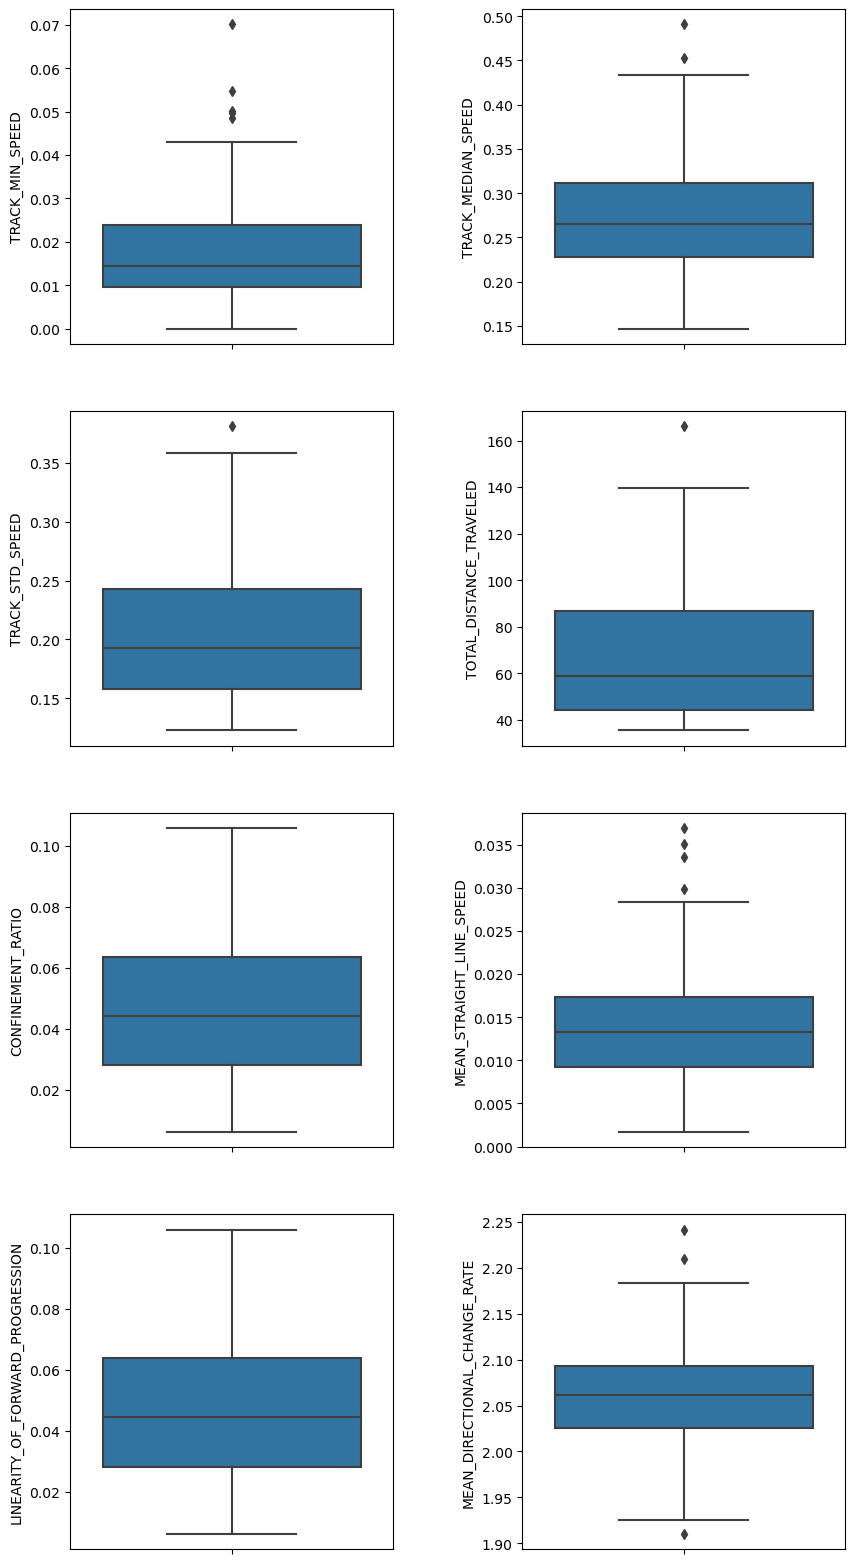

In [14]:
plt.figure(figsize=(10,20))
plt.subplot(4,2,1)
# 1. Boxplot TRACK_MIN_SPEED
sns.boxplot(data=df_wo_labels, y='TRACK_MIN_SPEED')
plt.subplot(4,2,2)
# 2. Boxplot TRACK_MEDIAN_SPEED
sns.boxplot(data=df_wo_labels, y='TRACK_MEDIAN_SPEED')
plt.subplot(4,2,3)
# 3. Boxplot TRACK_STD_SPEED
sns.boxplot(data=df_wo_labels, y='TRACK_STD_SPEED')
plt.subplot(4,2,4)
# 4. Boxplot TOTAL_DISTANCE_TRAVELED
sns.boxplot(data=df_wo_labels, y='TOTAL_DISTANCE_TRAVELED')
plt.subplot(4,2,5)
# 5. Boxplot CONFINEMENT_RATIO
sns.boxplot(data=df_wo_labels, y='CONFINEMENT_RATIO')
plt.subplot(4,2,6)
# 6. Boxplot MEAN_STRAIGHT_LINE_SPEED
sns.boxplot(data=df_wo_labels, y='MEAN_STRAIGHT_LINE_SPEED')
plt.subplot(4,2,7)
# 7. Boxplot LINEARITY_OF_FORWARD_PROGRESSION
sns.boxplot(data=df_wo_labels, y='LINEARITY_OF_FORWARD_PROGRESSION')
plt.subplot(4,2,8)
# 8. Boxplot MEAN_DIRECTIONAL_CHANGE_RATE
sns.boxplot(data=df_wo_labels, y='MEAN_DIRECTIONAL_CHANGE_RATE')
plt.subplots_adjust(wspace=0.4)
# plt.savefig("box_plot_out.jpg")
plt.show()

### Distribution of features:

Text(0, 0.5, 'Frequency')

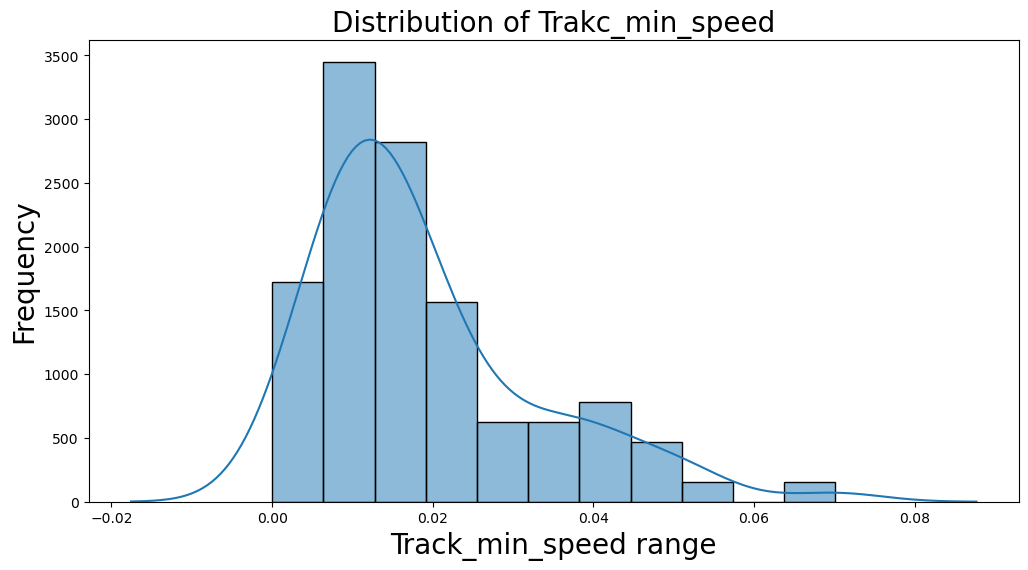

In [15]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['TRACK_MIN_SPEED'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of Trakc_min_speed", fontsize=20)
plt.xlabel('Track_min_speed range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
# plt.savefig("dist_min_speed_out.jpg")

Text(0, 0.5, 'Frequency')

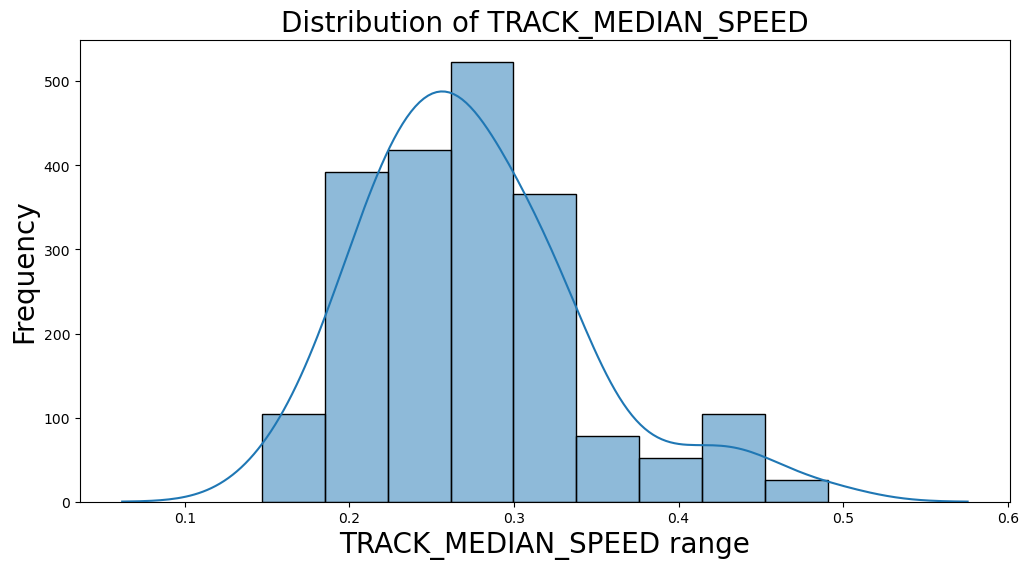

In [16]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['TRACK_MEDIAN_SPEED'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of TRACK_MEDIAN_SPEED", fontsize=20)
plt.xlabel('TRACK_MEDIAN_SPEED range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
# plt.savefig("dist_median_speed_out.jpg")

Text(0, 0.5, 'Frequency')

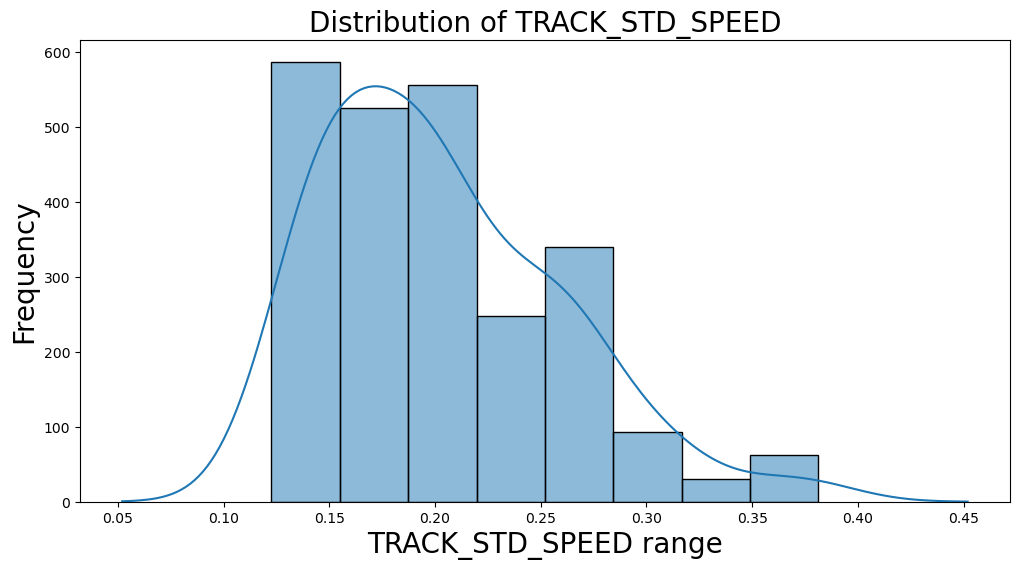

In [17]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['TRACK_STD_SPEED'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of TRACK_STD_SPEED", fontsize=20)
plt.xlabel('TRACK_STD_SPEED range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
# plt.savefig("dist_track_std_out.jpg")

Text(0, 0.5, 'Frequency')

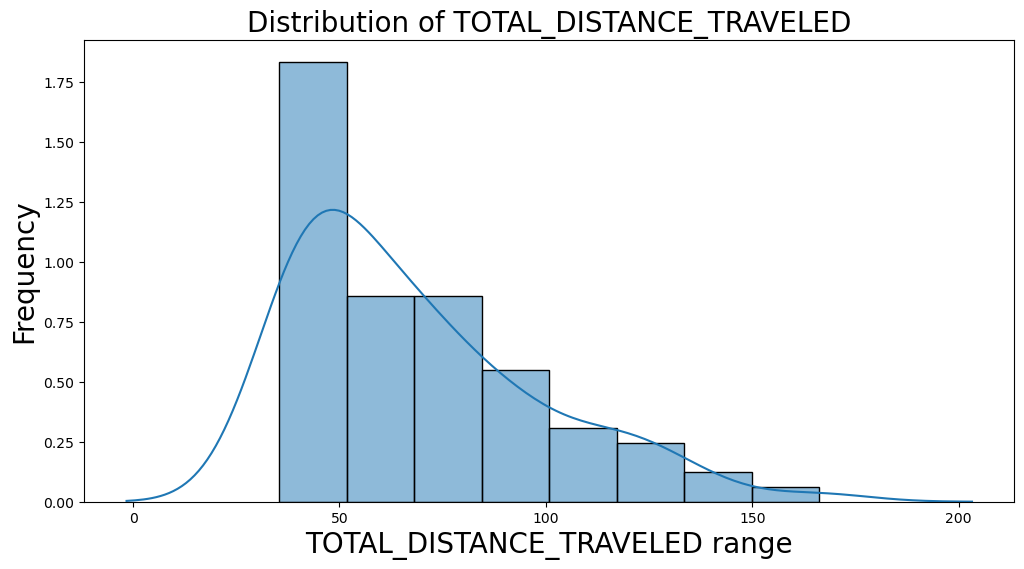

In [18]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['TOTAL_DISTANCE_TRAVELED'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of TOTAL_DISTANCE_TRAVELED", fontsize=20)
plt.xlabel('TOTAL_DISTANCE_TRAVELED range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
# plt.savefig("dist_total_distance_out.jpg")

Text(0, 0.5, 'Frequency')

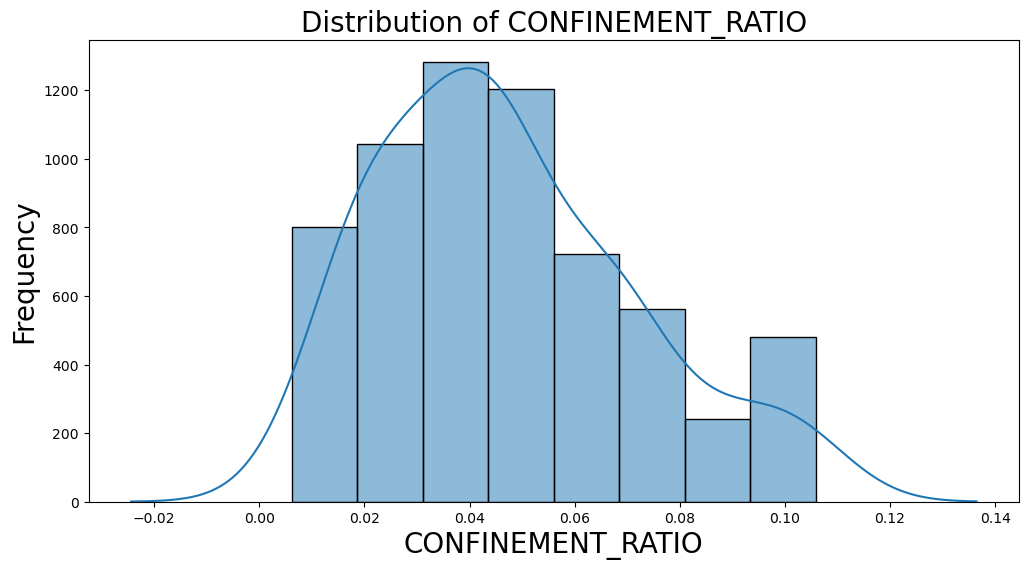

In [19]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['CONFINEMENT_RATIO'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of CONFINEMENT_RATIO", fontsize=20)
plt.xlabel('CONFINEMENT_RATIO', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
# plt.savefig("dist_confinement_out.jpg")

Text(0, 0.5, 'Frequency')

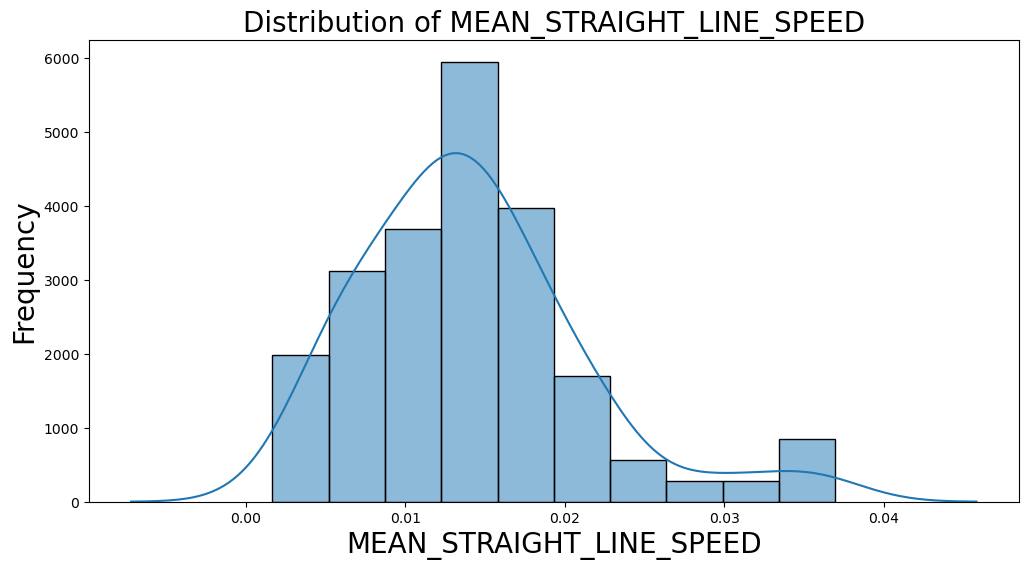

In [20]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['MEAN_STRAIGHT_LINE_SPEED'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of MEAN_STRAIGHT_LINE_SPEED", fontsize=20)
plt.xlabel('MEAN_STRAIGHT_LINE_SPEED', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
# plt.savefig("dist_mean_straight_out.jpg")

Text(0, 0.5, 'Frequency')

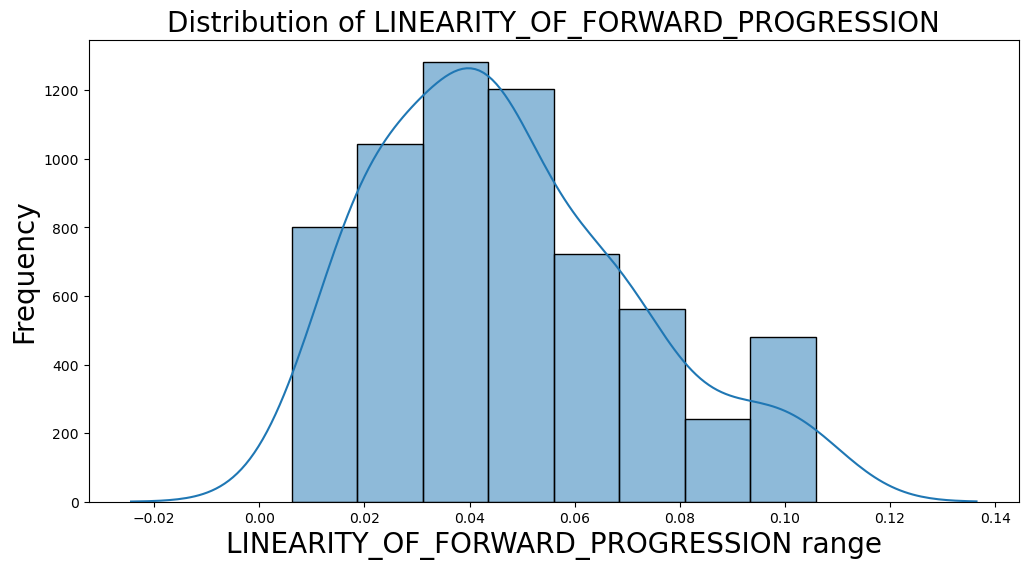

In [21]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['LINEARITY_OF_FORWARD_PROGRESSION'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of LINEARITY_OF_FORWARD_PROGRESSION", fontsize=20)
plt.xlabel('LINEARITY_OF_FORWARD_PROGRESSION range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
# plt.savefig("dist_linearity_out.jpg")

Text(0, 0.5, 'Frequency')

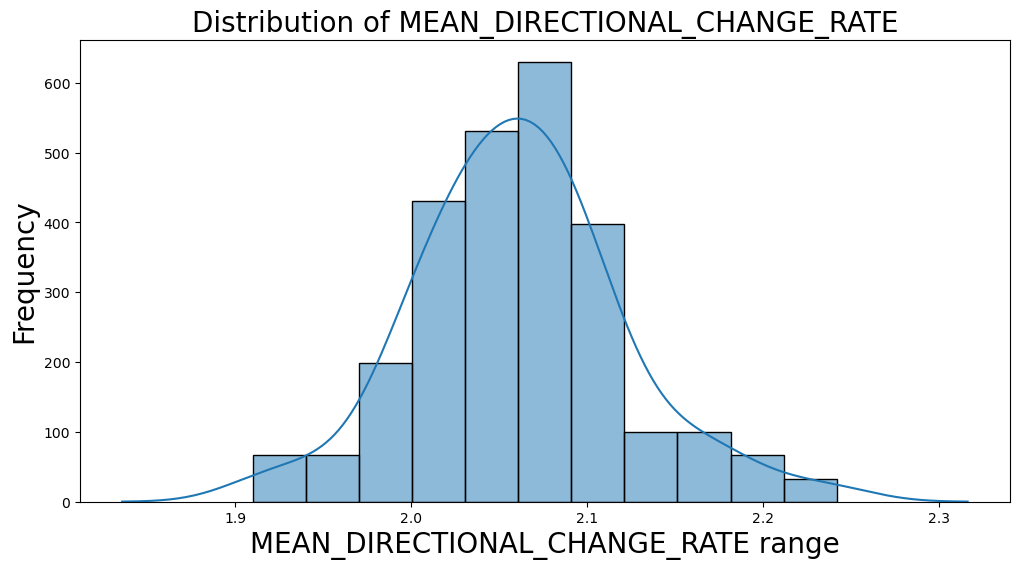

In [22]:
# defining the size of graph
plt.figure(figsize=(12, 6))
#  kde = kernel denisty estimate, 
# stat = which stat to use default count, 
# kde_kws = parameter controling kde size on plot  
sns.histplot(df_wo_labels['MEAN_DIRECTIONAL_CHANGE_RATE'], kde=True, 
             stat='frequency',
             kde_kws=dict(cut=3))
#setting the title
plt.title("Distribution of MEAN_DIRECTIONAL_CHANGE_RATE", fontsize=20)
plt.xlabel('MEAN_DIRECTIONAL_CHANGE_RATE range', fontsize=20)
plt.ylabel("Frequency", fontsize=20)
# plt.savefig("dist_mean_dchange_out.jpg")

### Q-Q plots:

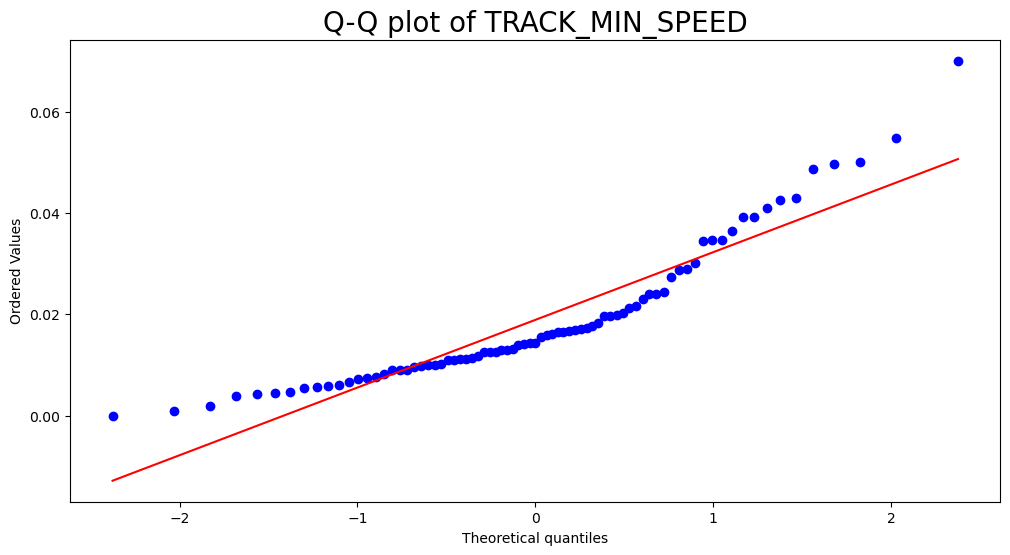

In [23]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['TRACK_MIN_SPEED'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of TRACK_MIN_SPEED", fontsize=20)
# plt.savefig("QQ_min_speed_out.jpg")
plt.show()

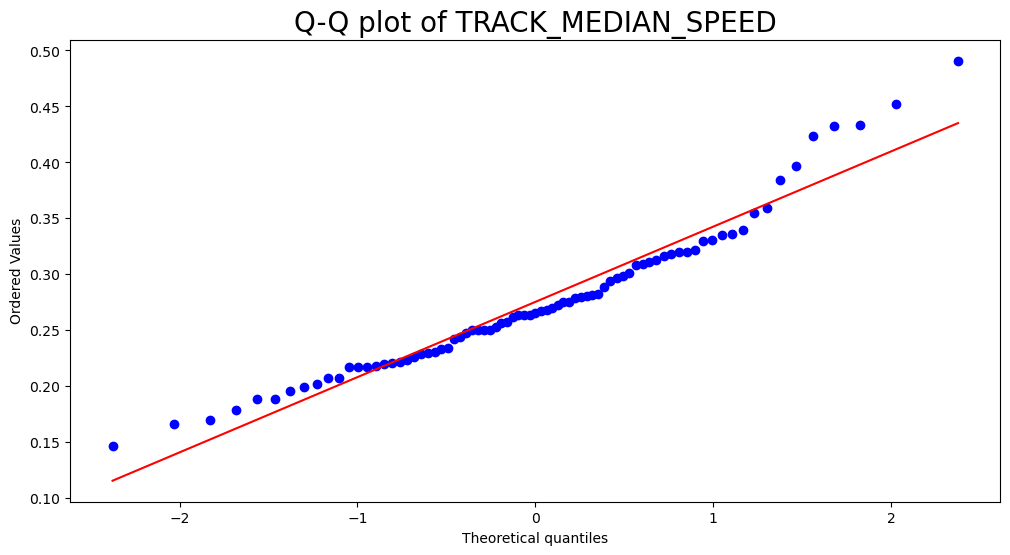

In [24]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['TRACK_MEDIAN_SPEED'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of TRACK_MEDIAN_SPEED", fontsize=20)
# plt.savefig("QQ_track_median_out.jpg")
plt.show()

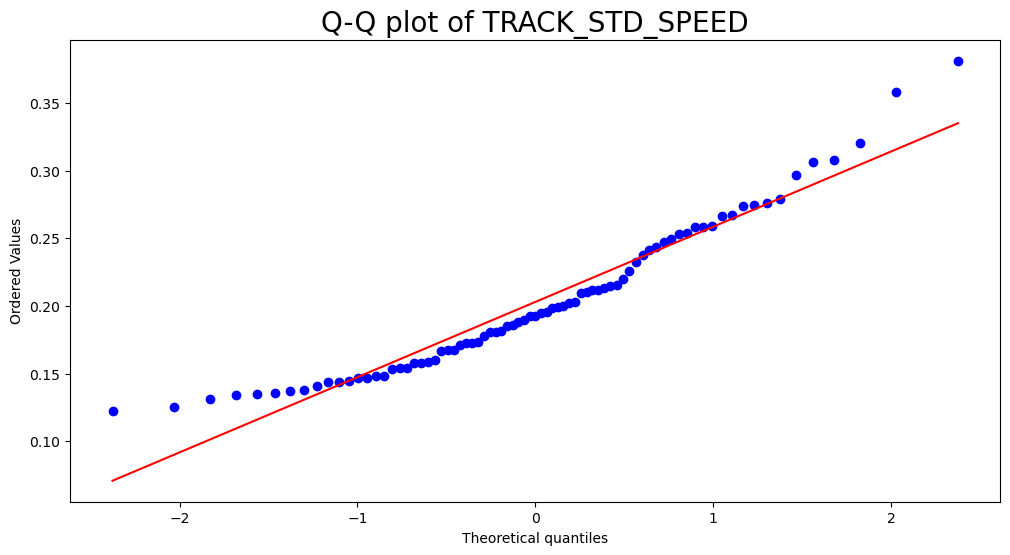

In [25]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['TRACK_STD_SPEED'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of TRACK_STD_SPEED", fontsize=20)
# plt.savefig("QQ_std_speed_out.jpg")
plt.show()

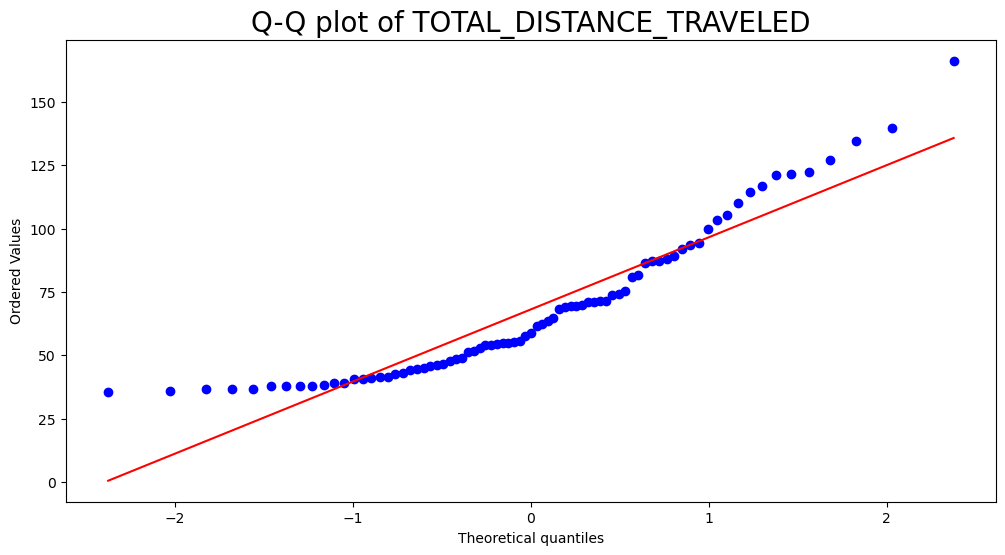

In [26]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['TOTAL_DISTANCE_TRAVELED'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of TOTAL_DISTANCE_TRAVELED", fontsize=20)
# plt.savefig("QQ_total_distance_out.jpg")
plt.show()

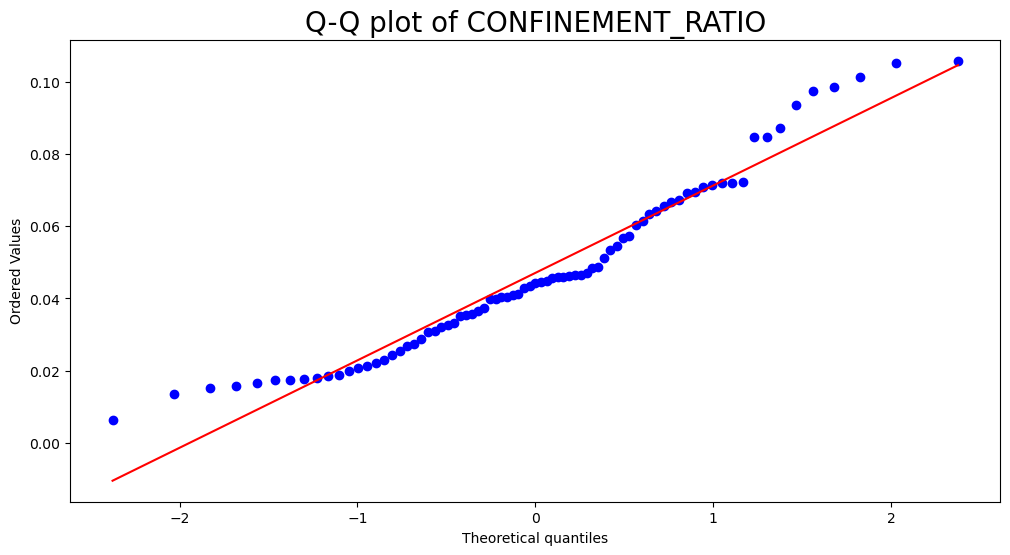

In [27]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['CONFINEMENT_RATIO'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of CONFINEMENT_RATIO", fontsize=20)
# plt.savefig("QQ_confinement_out.jpg")
plt.show()

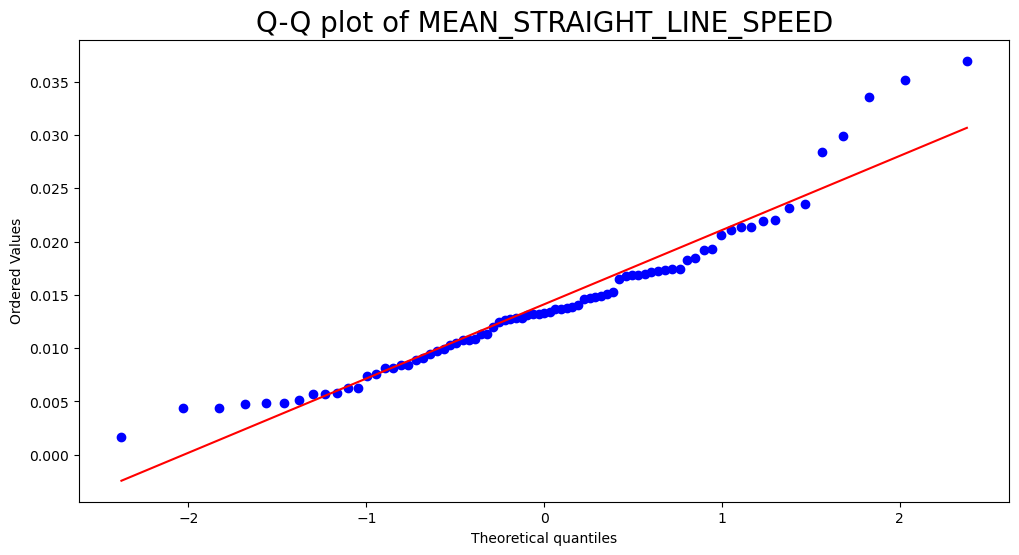

In [28]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['MEAN_STRAIGHT_LINE_SPEED'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of MEAN_STRAIGHT_LINE_SPEED", fontsize=20)
# plt.savefig("QQ_mean_straight_out.jpg")
plt.show()

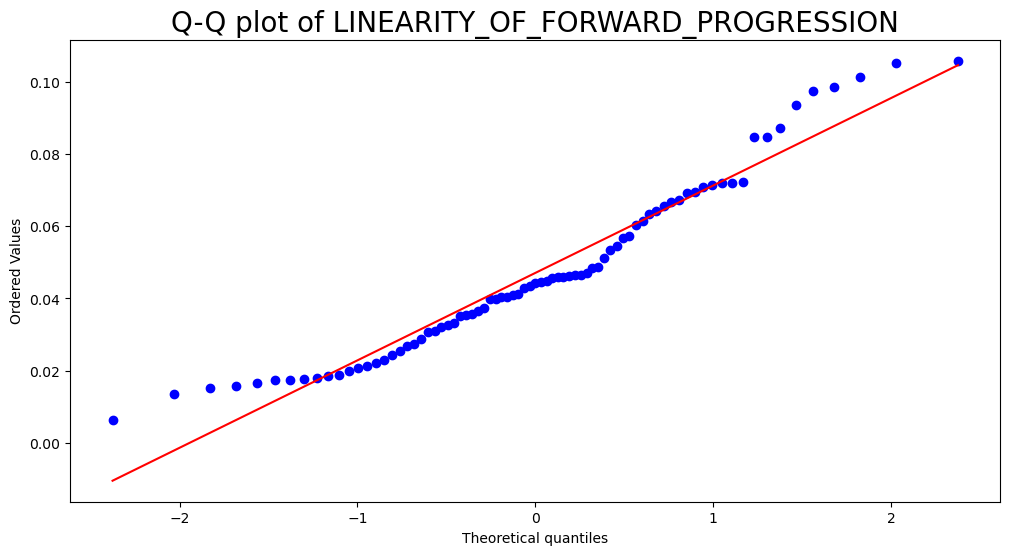

In [29]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['LINEARITY_OF_FORWARD_PROGRESSION'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of LINEARITY_OF_FORWARD_PROGRESSION", fontsize=20)
# plt.savefig("QQ_linearity_out.jpg")
plt.show()

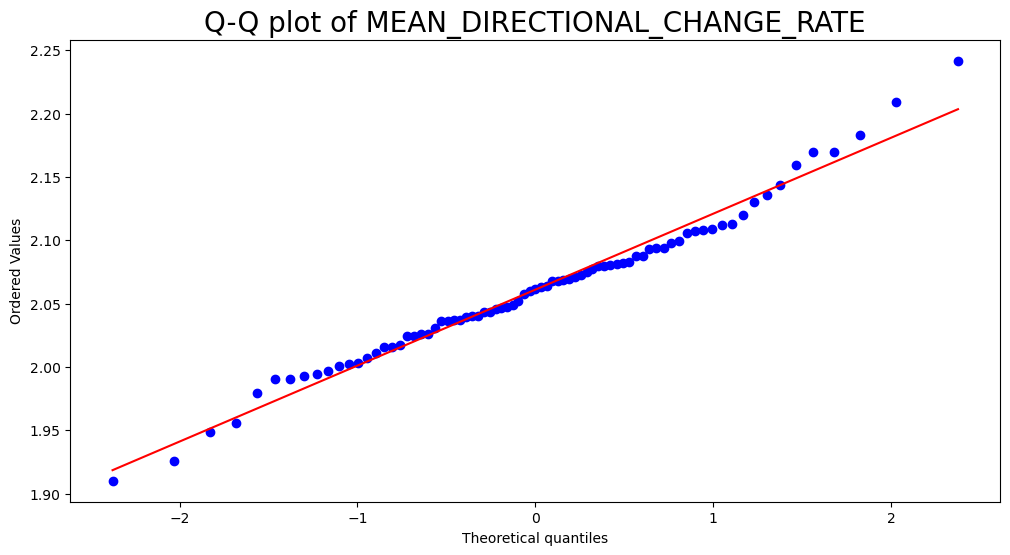

In [30]:
plt.figure(figsize=(12, 6))
stats.probplot(df_wo_labels['MEAN_DIRECTIONAL_CHANGE_RATE'],
               dist='norm', plot=plt)
plt.title("Q-Q plot of MEAN_DIRECTIONAL_CHANGE_RATE", fontsize=20)
# plt.savefig("QQ_mean_directional_out.jpg")
plt.show()

In [31]:
# Testing the normality of data, by Shapiro-Wilk test:
from scipy.stats import shapiro

for (columnName, columnData) in df_wo_labels.iteritems():
    print(f'{columnName}')
    # normality test
    stat, p = shapiro(columnData)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')

TRACK_MIN_SPEED
Statistics=0.878, p=0.000
Sample does not look Gaussian (reject H0)

TRACK_MEDIAN_SPEED
Statistics=0.949, p=0.003
Sample does not look Gaussian (reject H0)

TRACK_STD_SPEED
Statistics=0.937, p=0.001
Sample does not look Gaussian (reject H0)

TOTAL_DISTANCE_TRAVELED
Statistics=0.888, p=0.000
Sample does not look Gaussian (reject H0)

CONFINEMENT_RATIO
Statistics=0.947, p=0.002
Sample does not look Gaussian (reject H0)

MEAN_STRAIGHT_LINE_SPEED
Statistics=0.933, p=0.000
Sample does not look Gaussian (reject H0)

LINEARITY_OF_FORWARD_PROGRESSION
Statistics=0.947, p=0.002
Sample does not look Gaussian (reject H0)

MEAN_DIRECTIONAL_CHANGE_RATE
Statistics=0.983, p=0.389
Sample looks Gaussian (fail to reject H0)



### Checking correlation between data:

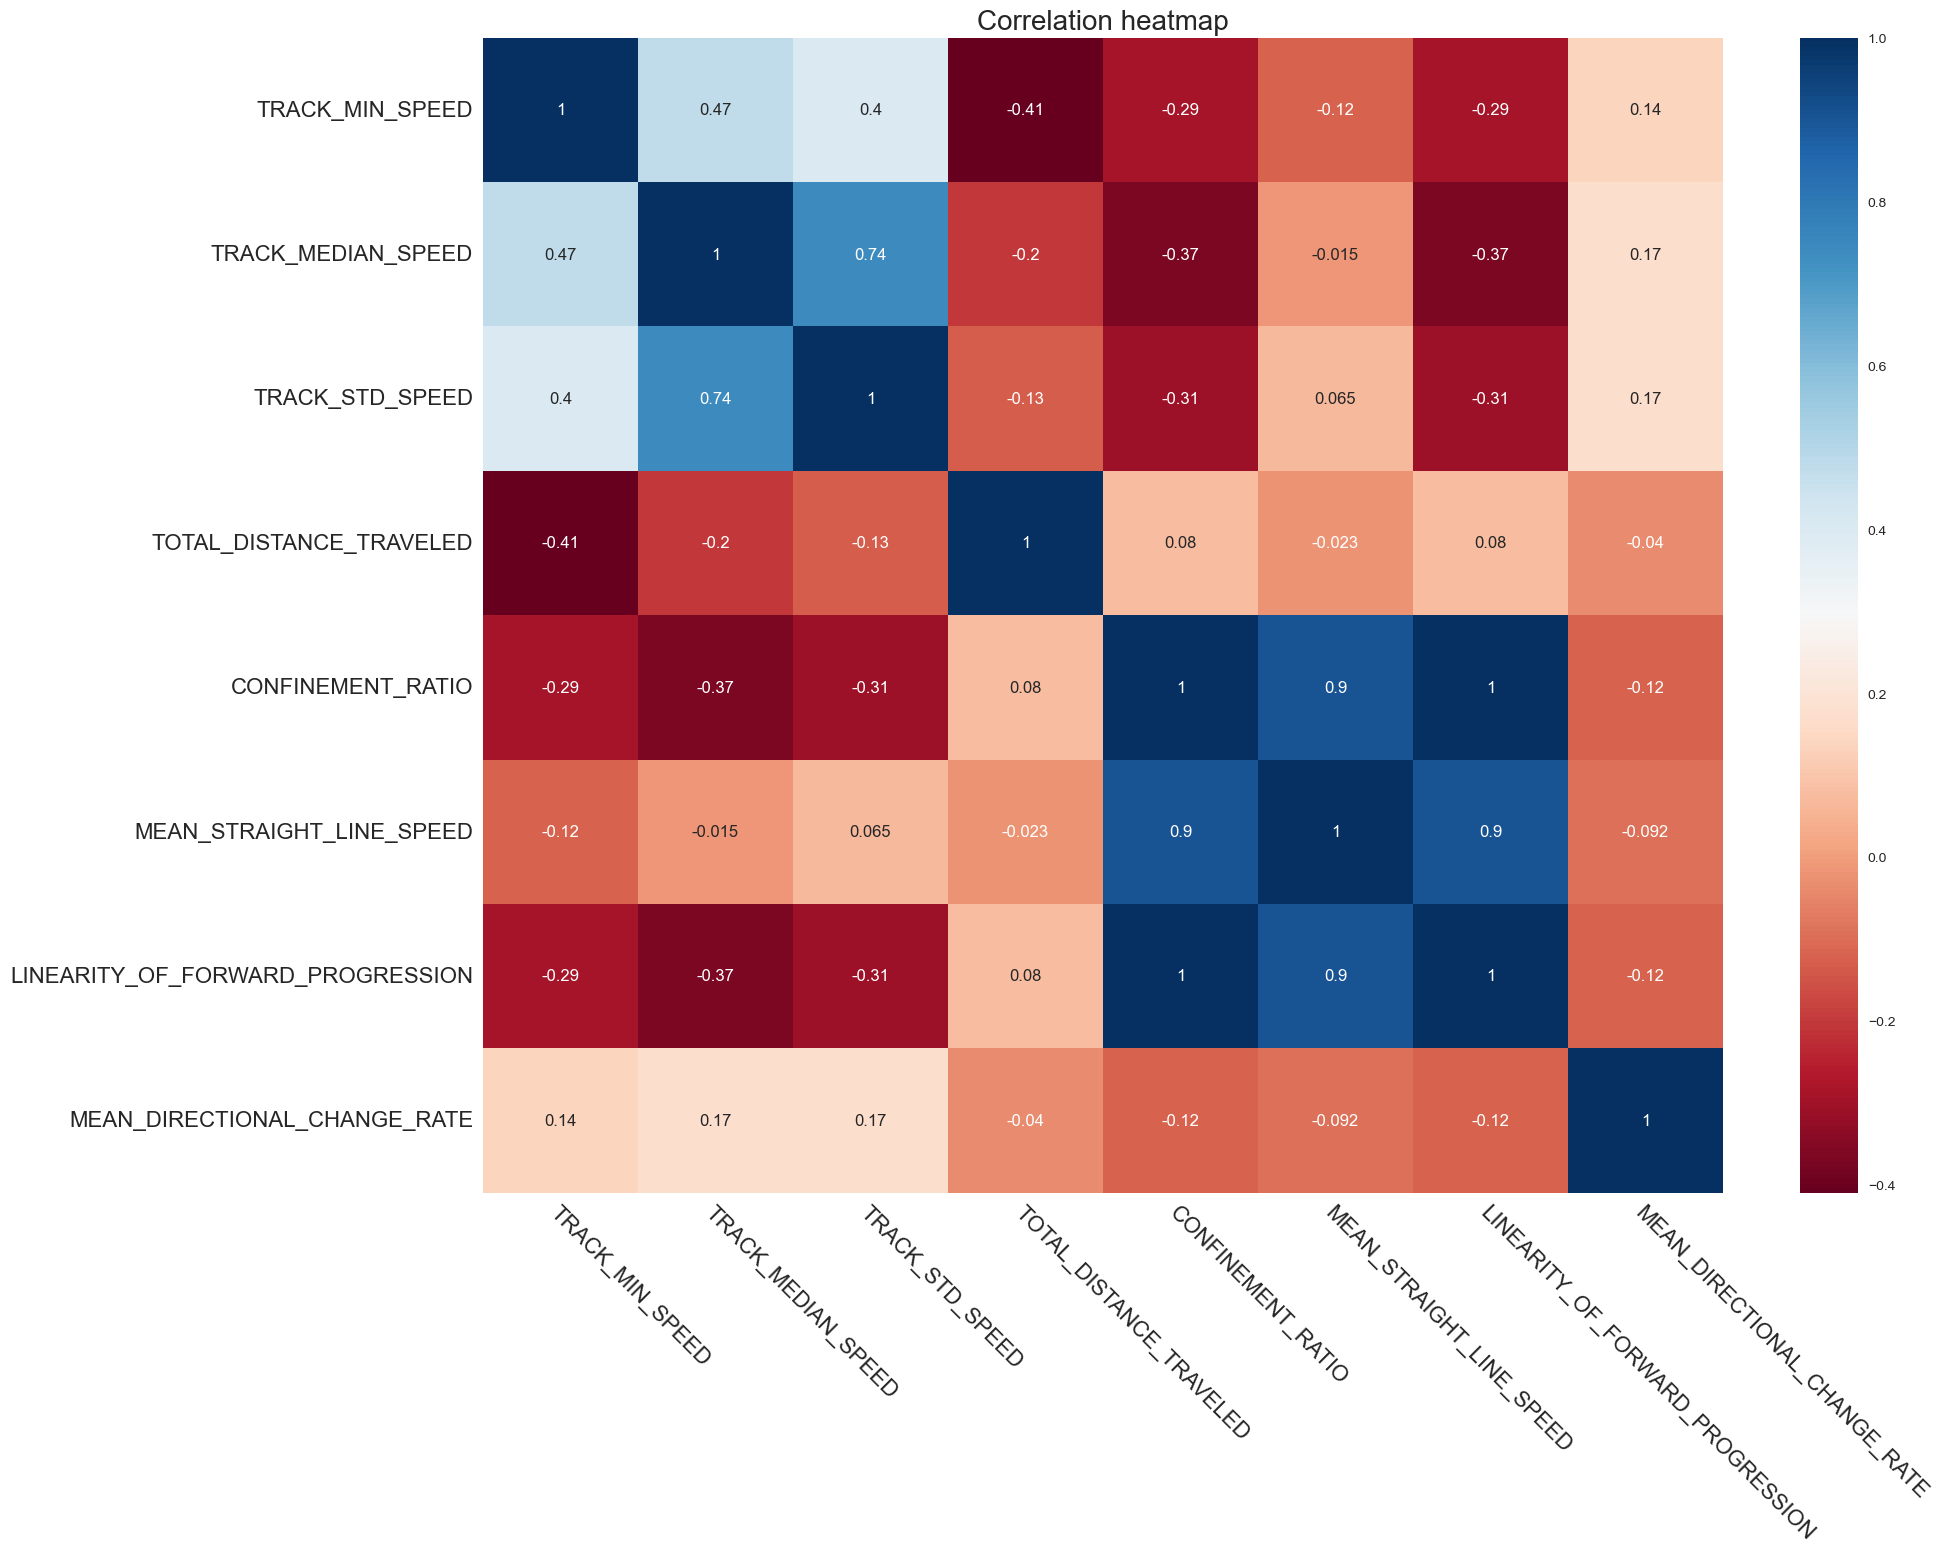

In [100]:
plt.figure(figsize=(20,15))
sns.heatmap(df_wo_labels.corr(method='spearman'),
            annot=True, cmap='RdBu')
plt.title('Correlation heatmap', fontsize=20)
plt.yticks(rotation=0, fontsize = 16)
plt.xticks(rotation=-45, ha='left', rotation_mode='anchor', fontsize = 16)
plt.savefig("heatmap_spearman_out.jpg")
plt.show()

### Cluster analysis:

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling data: performing clustering on dataset with all features

df_wol_scale = df_wo_labels.copy()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_wol_scale.values),
                        columns=df_wol_scale.columns,
                         index=df_wol_scale.index)
# df_scaled.head()

In [34]:
# Converting our data fram to np.array:

whole_df = np.array(df_scaled.loc[:,['TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED',
                                     'TRACK_STD_SPEED', 'TOTAL_DISTANCE_TRAVELED',
                                     'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED',
                                     'LINEARITY_OF_FORWARD_PROGRESSION',
                                     'MEAN_DIRECTIONAL_CHANGE_RATE']])

In [35]:
# Determining the number of clusters using the elbow method:

'''
Inertia can be recognized as a measure of how internally coherent clusters are. 
'''
inertia = []
n_clust = range(1,10)

for n in n_clust:
    kmeanModel =  KMeans(n_clusters=n)
    kmeanModel.fit(whole_df)
    inertia.append(kmeanModel.inertia_)

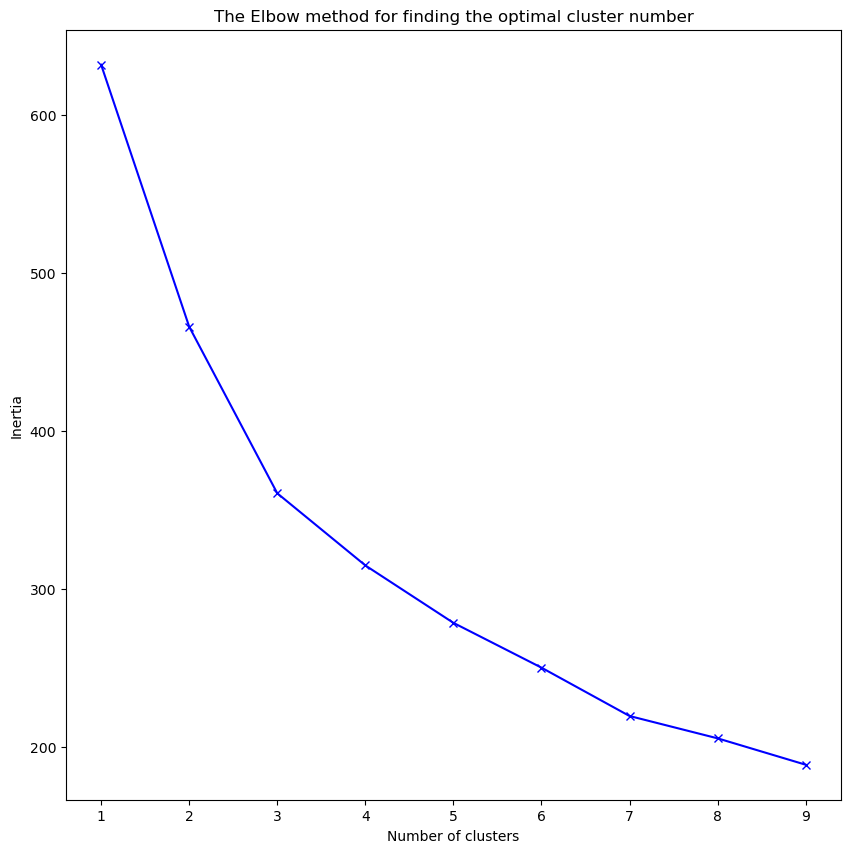

In [36]:
# Ploting the disortions of K-means:
plt.figure(figsize=(10,10))
# bx- = [blue][markers as x][- skip this argument]
plt.plot(n_clust, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow method for finding the optimal cluster number')
plt.show()

In [37]:
# The Silhuette score metod for defining number of clusters

from sklearn.metrics import silhouette_score

sil = []
n_clust_max = range(2,11)

# To perform this method we have to start from 2 clusters:
for n in n_clust_max:
    kmeans_sil = KMeans(n_clusters=n).fit(whole_df)
    labels = kmeans_sil.labels_
    sil.append(silhouette_score(whole_df, labels, metric = 'euclidean'))

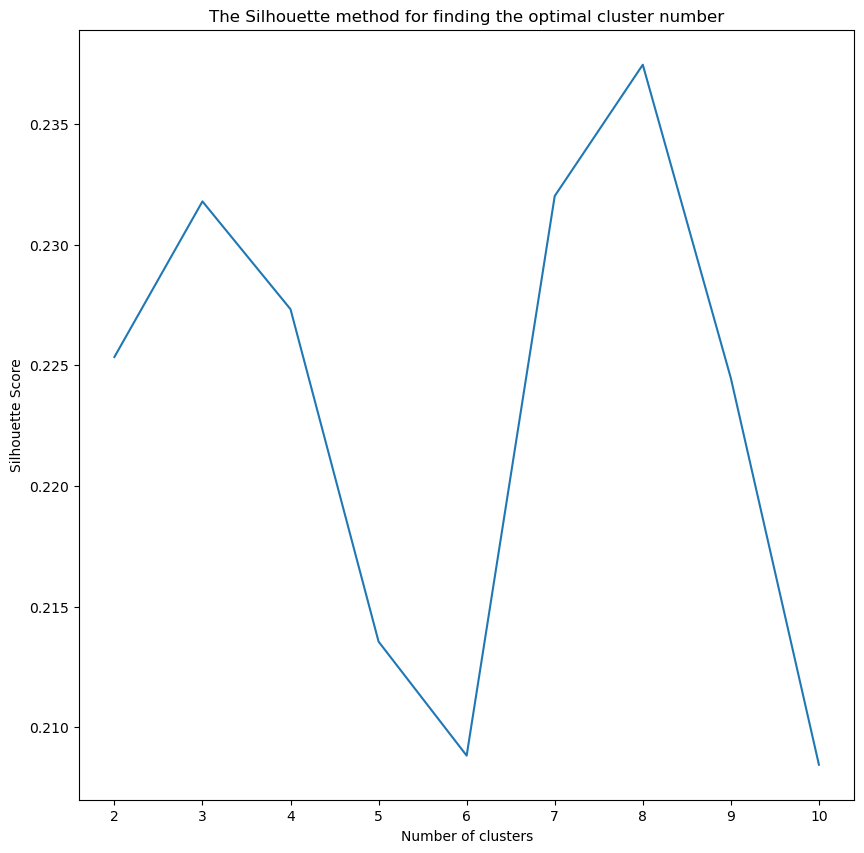

In [38]:
# Ploting the values of Silhouette score:
plt.figure(figsize=(10,10))
plt.plot(n_clust_max, sil)
plt.xlabel('Number of clusters')
plt.ylabel("Silhouette Score")
plt.title("The Silhouette method for finding the optimal cluster number")
plt.show()

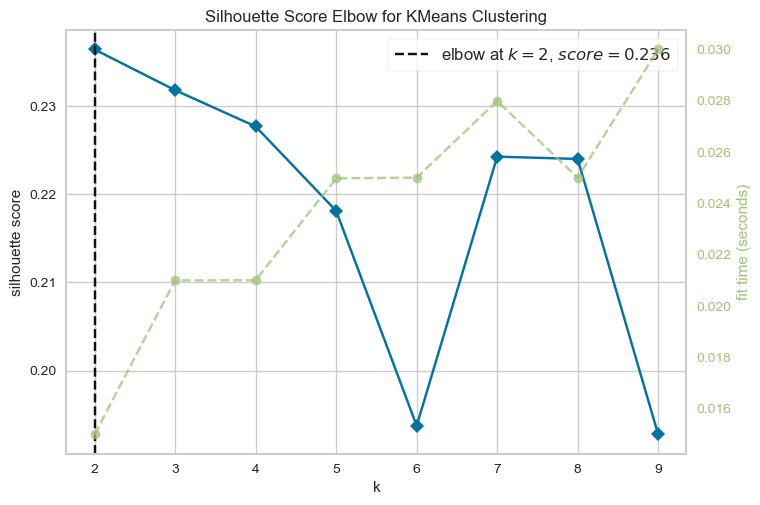

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [39]:
# Silhouette score with automatic suggestion of the cluster number

from yellowbrick.cluster import KElbowVisualizer
model = KMeans() 
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True, metric='silhouette')
visualizer.fit(whole_df)        # Fit data to visualizer
visualizer.show() 

In [40]:
# Performing clustering:
# kmeans_fp = kmeans fixed parameters
kmeans_fp = KMeans(n_clusters=2, init='k-means++', n_init=50, max_iter=15000,
                  random_state=1)
labels_fp = kmeans_fp.fit_predict(whole_df)
# print(labels_fp)

In [41]:
df_scaled_w_label = df_scaled.copy()
df_scaled_w_label['Label'] = labels_fp
df_scaled_w_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TRACK_MIN_SPEED                   79 non-null     float64
 1   TRACK_MEDIAN_SPEED                79 non-null     float64
 2   TRACK_STD_SPEED                   79 non-null     float64
 3   TOTAL_DISTANCE_TRAVELED           79 non-null     float64
 4   CONFINEMENT_RATIO                 79 non-null     float64
 5   MEAN_STRAIGHT_LINE_SPEED          79 non-null     float64
 6   LINEARITY_OF_FORWARD_PROGRESSION  79 non-null     float64
 7   MEAN_DIRECTIONAL_CHANGE_RATE      79 non-null     float64
 8   Label                             79 non-null     int32  
dtypes: float64(8), int32(1)
memory usage: 5.4 KB


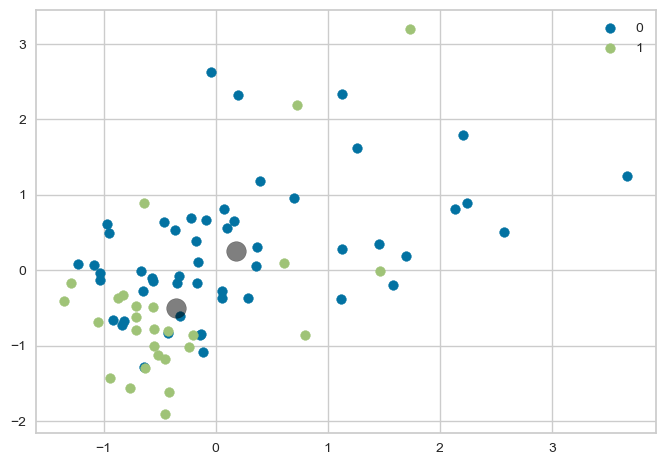

In [42]:
# Data with labels and centroids:
u_labels = np.unique(labels_fp)
# print(u_labels)
for i in u_labels:
    plt.scatter(whole_df[labels_fp==i, 0], whole_df[labels_fp==i, 1],
                label=i)
centers = kmeans_fp.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.legend()
plt.show()

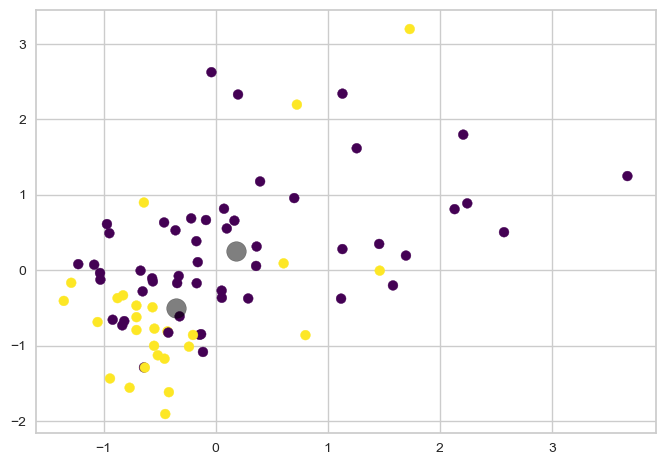

In [43]:
# Ploting the data with labels:
points= plt.scatter(whole_df[:, 0], whole_df[:, 1], c=labels_fp, s=50,
            cmap='viridis')

centers = kmeans_fp.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

### All features together plotted with each other

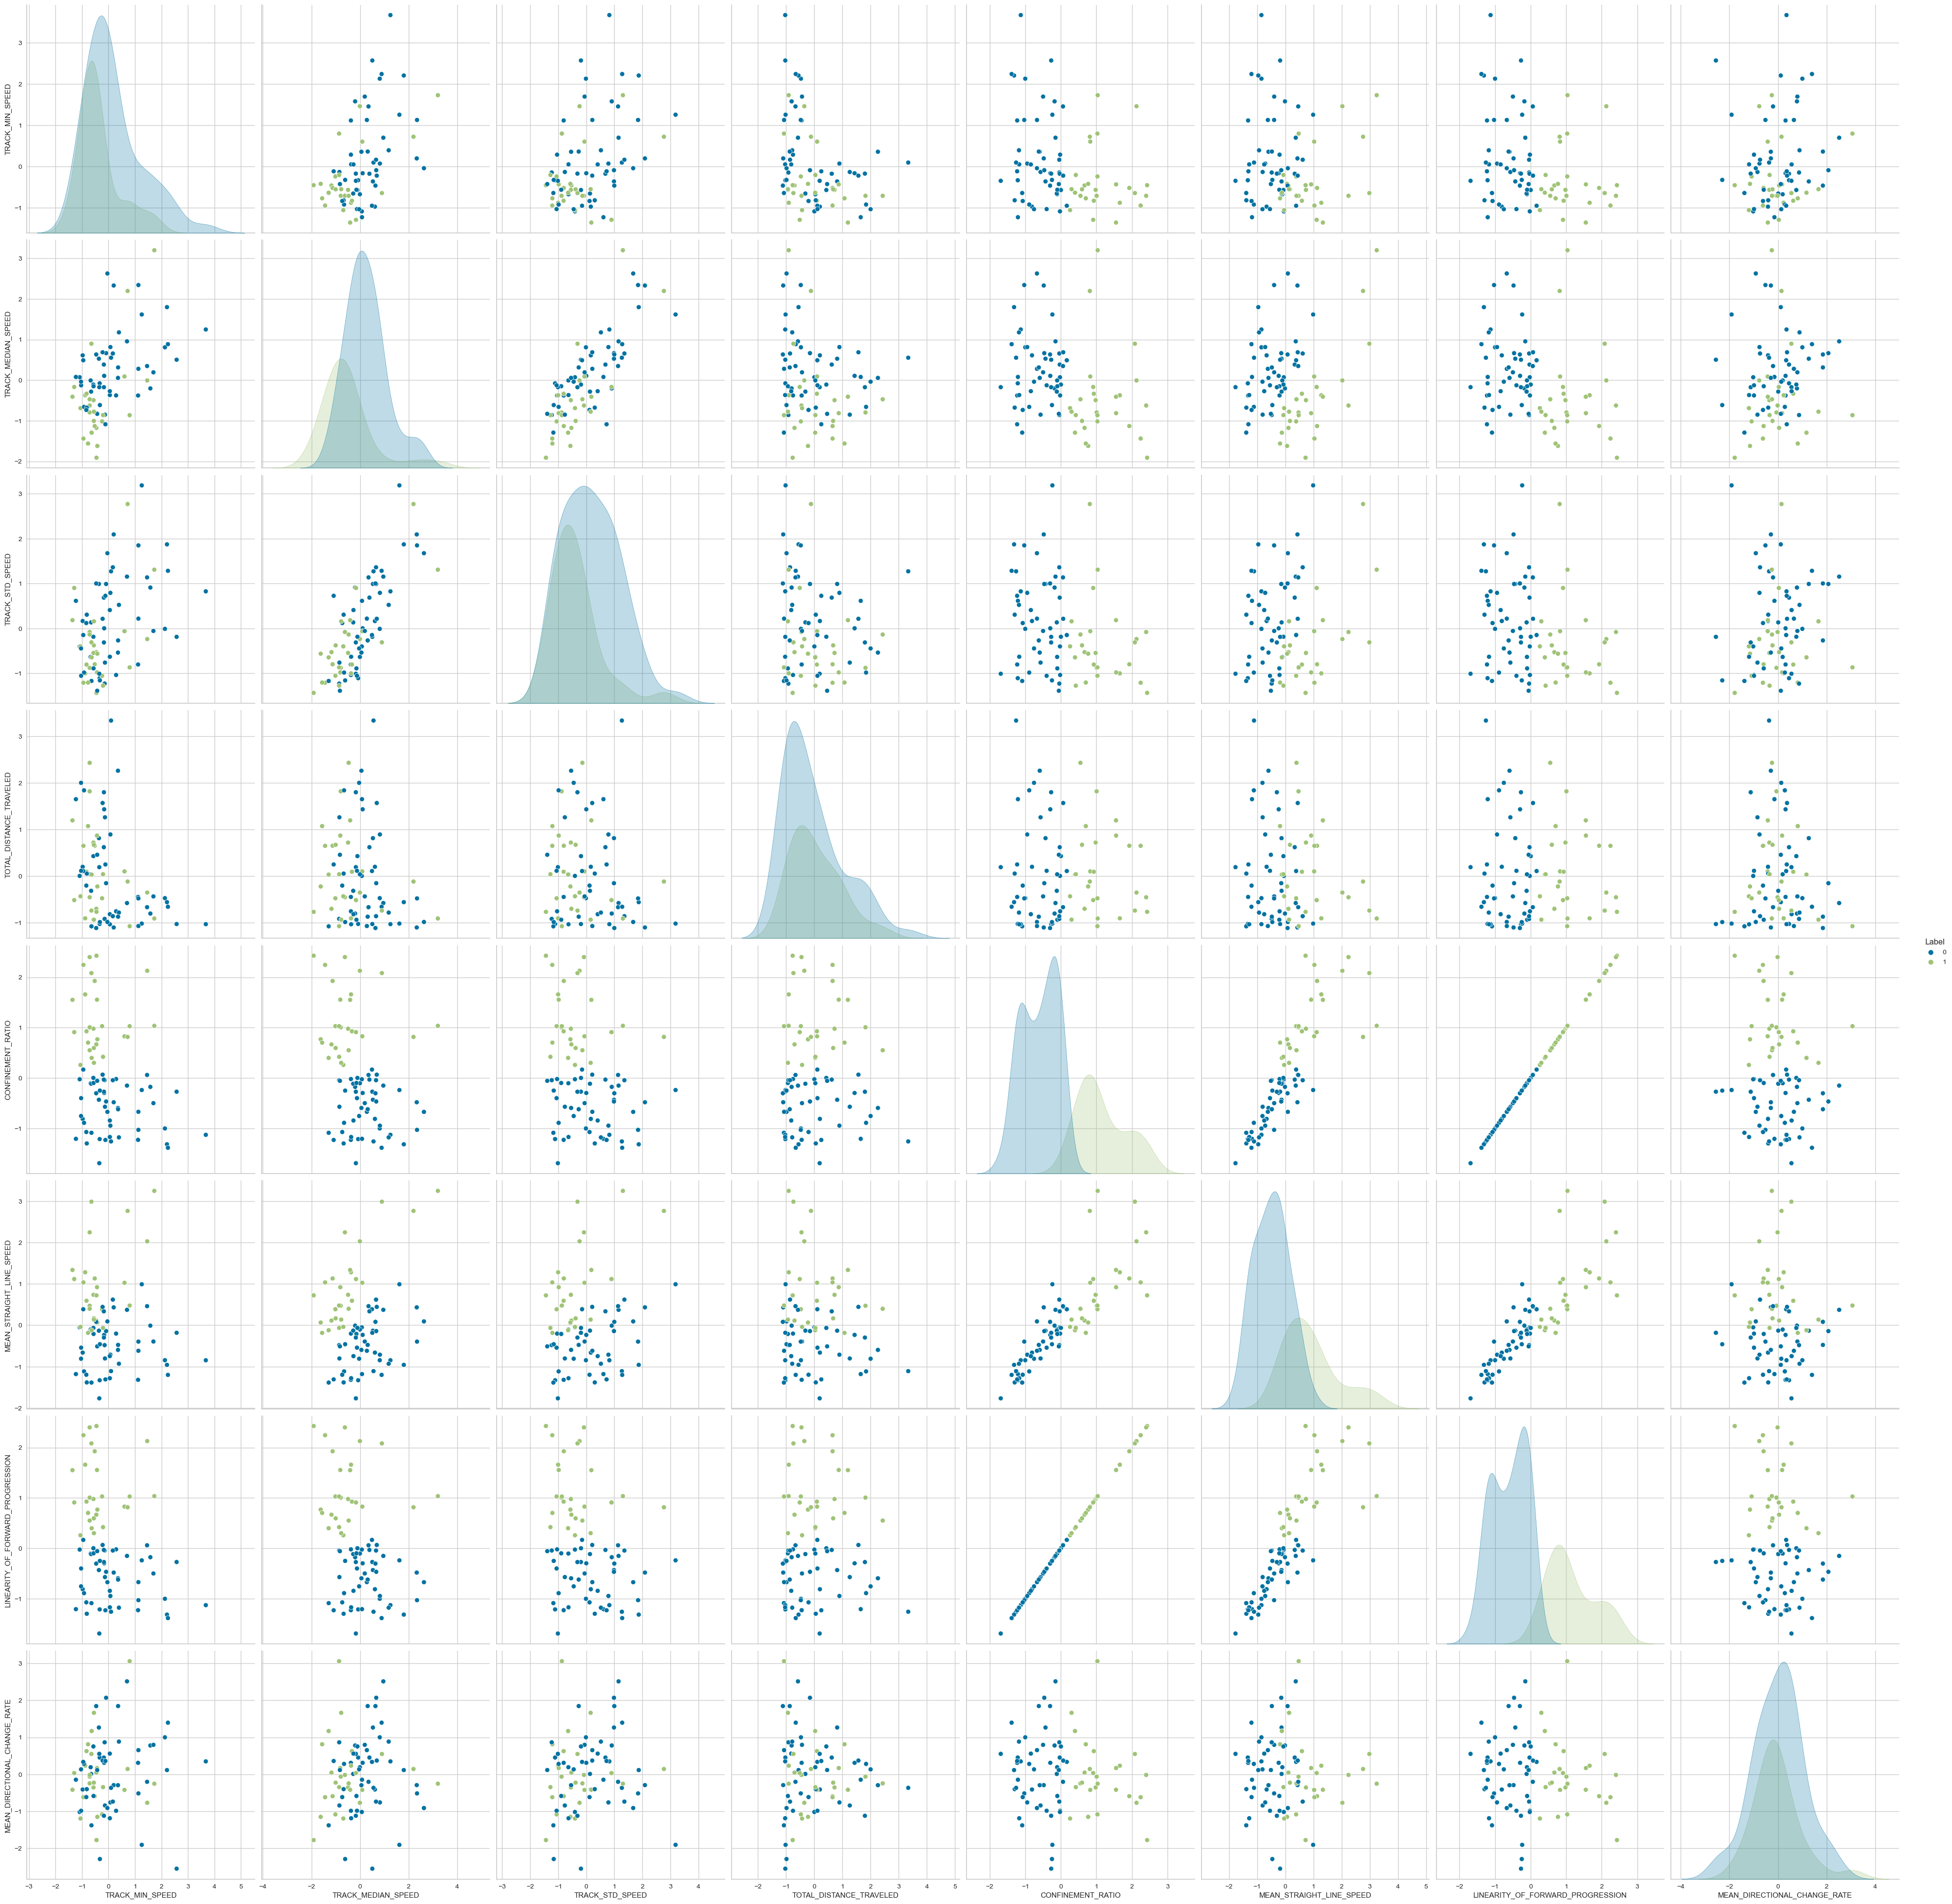

In [44]:
pair_plot = sns.pairplot(df_scaled_w_label, hue='Label', height=5)
# Saving plot to png:
plt.savefig("pair_plot_out.jpg")

### Polar plot of clusters features

In [45]:
import plotly.express as px
import kaleido

polar=df_scaled_w_label.groupby('Label').median().reset_index()
polar=pd.melt(polar, id_vars=['Label'])

fig = px.line_polar(polar, r='value', 
                    theta='variable', color='Label', 
                   line_close=True, height=800, width=1000)

fig.write_image("line_polar_2K.jpeg")
fig.show()

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


In [46]:
# Grouping by labels which make groups by cluster
pie_df = df_scaled_w_label.groupby('Label').size().reset_index()
# naming columns of df to make them nor normal names insted of generated by code
pie_df.columns=['Label', 'value']
fig_pie = px.pie(pie_df, values='value', names='Label', color='Label',
                title='Population of clusters')
fig_pie.write_image("pie_plot_2K.jpeg")
fig_pie.show()

In [47]:
# Cluster participation:

cust0=df_scaled_w_label[df_scaled_w_label.Label==0]
print(f"The number of observation in cluster 0 = {len(cust0)}")
print(f"The observation indexes from data_frame are:{cust0.index.values}")
print("===========================================\n")
cust1=df_scaled_w_label[df_scaled_w_label.Label==1]
print(f"The number of observation in cluster 1 = {len(cust1)}")
print(f"The observation indexes from data_frame are:{cust1.index.values}")
print("===========================================\n")


The number of observation in cluster 0 = 52
The observation indexes from data_frame are:[ 2  3  4  6  7  8  9 10 13 15 17 19 20 21 25 28 31 33 35 38 39 41 42 44
 45 46 47 48 49 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 76 78]

The number of observation in cluster 1 = 27
The observation indexes from data_frame are:[ 0  1  5 11 12 14 16 18 22 23 24 26 27 29 30 32 34 36 37 40 43 50 58 73
 74 75 77]



### Using UMAP method to reduce dimensionality:

In [48]:
from umap import UMAP

# making df for umap approach:
df_umap = df_scaled.copy()

umap_reducer = UMAP(n_neighbors=15, n_components=2, metric='euclidean',
                   n_epochs=1000, random_state = 42, transform_seed=43)

umap_transformed = umap_reducer.fit_transform(df_umap)
umap_transformed.shape

(79, 2)

In [49]:
# Performing clustering on reduced set:
kmeans_after_umap = KMeans(n_clusters=2, init='k-means++', n_init=50,
                           max_iter=15000, random_state=1)
labels_after_umap = kmeans_after_umap.fit_predict(umap_transformed)
print(labels_after_umap)

[0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 1]


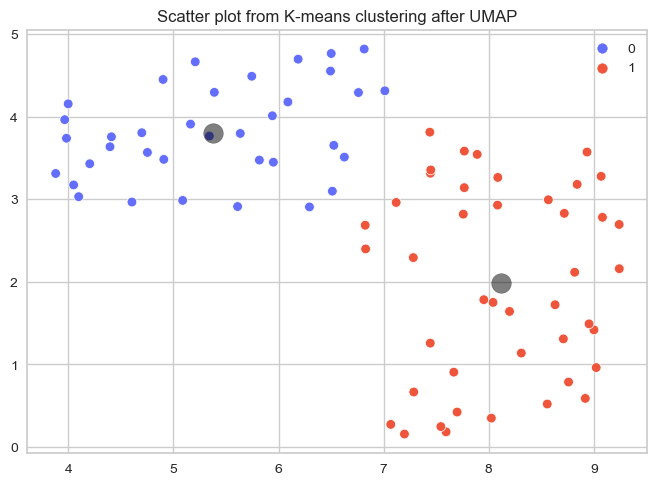

In [50]:
colors_from_plotly = ['#636EFA', '#EF553B']
sns.scatterplot(x = umap_transformed[:,0], y = umap_transformed[:, 1],
                data = umap_transformed, hue = labels_after_umap, 
                palette = colors_from_plotly
               ).set_title('Scatter plot from K-means clustering after UMAP')

centers = kmeans_after_umap.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.savefig("Scatter_umap_out.jpg")
plt.show()

In [51]:
# Making df for umap_reduction:
df_w_k_means_labels_umap = df_scaled.copy()
df_w_k_means_labels_umap['Label'] = labels_after_umap

# Polar plot of all clusters after hierarchical clustering to show similarities of data
polar_after_umap=df_w_k_means_labels_umap.groupby('Label').median().reset_index()
polar_after_umap_after_melt=pd.melt(polar_after_umap, id_vars=['Label'])

fig_polar_umap = px.line_polar(polar_after_umap_after_melt, r='value', 
                    theta='variable', color='Label', 
                   line_close=True, height=800, width=1000)

fig_polar_umap.write_image("polar_plot_umap.jpeg")
fig_polar_umap.show()

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [52]:
# Cluster participation:

cust0_umap=df_w_k_means_labels_umap[df_w_k_means_labels_umap.Label==0]
print(f"The number of observation in cluster 0 = {len(cust0_umap)}")
print(f"The observation indexes are:{cust0_umap.index.values}")
print("===========================================\n")
cust1_umap=df_w_k_means_labels_umap[df_w_k_means_labels_umap.Label==1]
print(f"The number of observation in cluster 1 = {len(cust1_umap)}")
print(f"The observation indexes are:{cust1_umap.index.values}")
print("===========================================\n")

The number of observation in cluster 0 = 36
The observation indexes are:[ 0  1  3  5 11 12 13 14 16 17 18 20 22 23 24 26 27 29 30 31 32 33 34 35
 36 37 40 43 49 51 58 61 74 75 76 77]

The number of observation in cluster 1 = 43
The observation indexes are:[ 2  4  6  7  8  9 10 15 19 21 25 28 38 39 41 42 44 45 46 47 48 50 52 53
 54 55 56 57 59 60 62 63 64 65 66 67 68 69 70 71 72 73 78]



In [53]:
# Grouping by labels which make groups by cluster
pie_df_umap = df_w_k_means_labels_umap.groupby('Label').size().reset_index()
# naming columns of df to make them nor normal names insted of generated by code
pie_df_umap.columns=['Label', 'value']
fig_pie_umap = px.pie(pie_df_umap, values='value', names='Label', color='Label',
                     title='Population of clusters after UMAP')
fig_pie_umap.write_image("pie_plot_umap.jpeg")
fig_pie_umap.show()

### Performing hierarchical clustering for inside of neighbourhoods

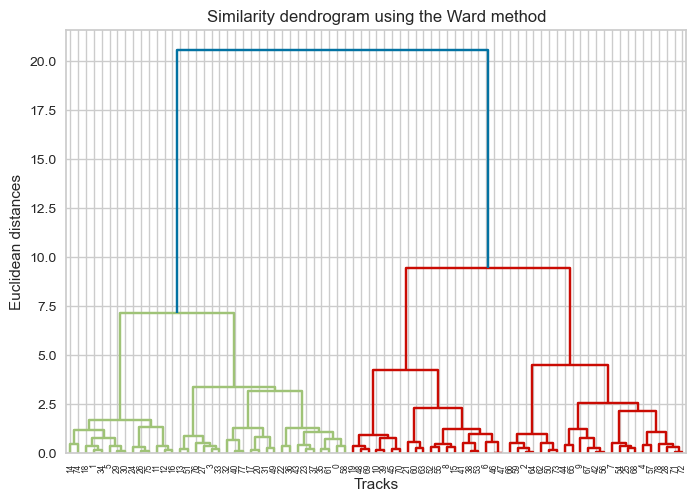

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

# performing hierarchical clustering on whole df, after scaling,
# umap dimensionality reduction
linkage_data = linkage(umap_transformed, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel('Tracks')
plt.ylabel('Euclidean distances')
plt.title('Similarity dendrogram using the Ward method')
# plt.savefig("hierarchical_clustering_dendrogram.jpg")
plt.show()

In [55]:
# Ploting the outpu from hierarchical clustering:
from sklearn.cluster import AgglomerativeClustering

# same set used on umap_reducted data
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, 
                                              affinity='euclidean',
                                              linkage = 'ward')

hierarchical_cluster.fit_predict(umap_transformed)
hierarchy_labels = hierarchical_cluster.labels_

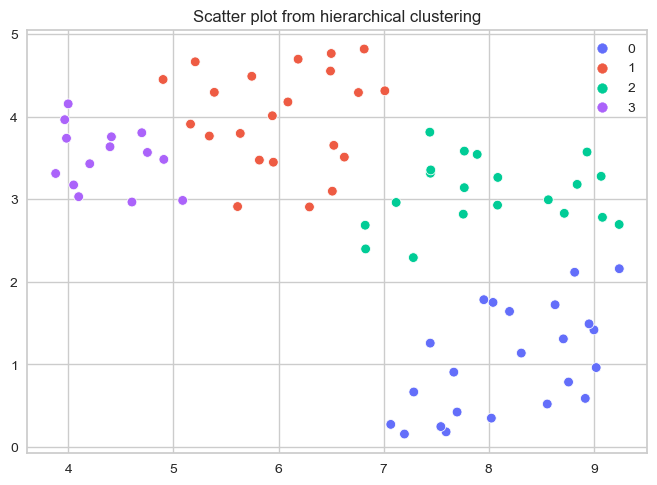

In [56]:
colors_for_hierarchy = ['#636EFA', '#EE5B43', '#00CC96', '#AB63FA']
sns.scatterplot(x = umap_transformed[:,0], y = umap_transformed[:, 1],
                data = umap_transformed, hue = hierarchy_labels, 
                palette = colors_for_hierarchy
               ).set_title('Scatter plot from hierarchical clustering')
plt.legend()
plt.savefig("hierarchical_clustering_scatter.jpg")
plt.show()

In [57]:
# Looking for inside of data after umap reduction and hierarchical clustering 
df_w_hierarchy_labels_scaled = df_scaled.copy()
df_w_hierarchy_labels_scaled['Label'] = hierarchy_labels

In [58]:
# Polar plot of all clusters after hierarchical clustering to show similarities of data
polar_hierarchy=df_w_hierarchy_labels_scaled.groupby('Label').median().reset_index()
polar_hierarchy_after_melt=pd.melt(polar_hierarchy, id_vars=['Label'])

fig_polar_hierarchy = px.line_polar(polar_hierarchy_after_melt, r='value', 
                    theta='variable', color='Label', 
                   line_close=True, height=800, width=1000)
fig_polar_hierarchy.write_image("polar_plot_hierarchy.jpeg")
fig_polar_hierarchy.show()

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alek\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [59]:
# Grouping by labels which make groups by cluster
pie_df_hierarchy = df_w_hierarchy_labels_scaled.groupby('Label').size().reset_index()
# naming columns of df to make them nor normal names insted of generated by code
pie_df_hierarchy.columns=['Label', 'value']
fig_pie_hierarchy = px.pie(pie_df_hierarchy, values='value', names='Label', color='Label',
                          title='Population of clusters after hierarchical clustering')
fig_pie_hierarchy.write_image("pie_plot_hierarchy.jpeg")
fig_pie_hierarchy.show()

In [60]:
# Finding out how many observation is in each cluster:
df_w_hierarchy_labels_scaled.groupby(['Label'])['Label'].count()

Label
0    23
1    22
2    20
3    14
Name: Label, dtype: int64

In [61]:
# Cluster participation:

cust0_hierarchy=df_w_hierarchy_labels_scaled[df_w_hierarchy_labels_scaled.Label==0]
print(f"The number of observation in cluster 0 = {len(cust0_hierarchy)}")
print(f"The observation indexes are:{cust0_hierarchy.index.values}")
print("===========================================\n")
cust1_hierarchy=df_w_hierarchy_labels_scaled[df_w_hierarchy_labels_scaled.Label==1]
print(f"The number of observation in cluster 1 = {len(cust1_hierarchy)}")
print(f"The observation indexes are:{cust1_hierarchy.index.values}")
print("===========================================\n")
cust2_hierarchy=df_w_hierarchy_labels_scaled[df_w_hierarchy_labels_scaled.Label==2]
print(f"The number of observation in cluster 2 = {len(cust2_hierarchy)}")
print(f"The observation indexes are:{cust2_hierarchy.index.values}")
print("===========================================\n")
cust3_hierarchy=df_w_hierarchy_labels_scaled[df_w_hierarchy_labels_scaled.Label==3]
print(f"The number of observation in cluster 3 = {len(cust3_hierarchy)}")
print(f"The observation indexes are:{cust3_hierarchy.index.values}")
print("===========================================\n")

The number of observation in cluster 0 = 23
The observation indexes are:[ 2  4  7  9 25 28 42 44 50 54 56 57 59 62 64 65 66 67 68 71 72 73 78]

The number of observation in cluster 1 = 22
The observation indexes are:[ 0  3 13 17 20 22 23 27 31 32 33 35 36 37 40 43 49 51 58 61 76 77]

The number of observation in cluster 2 = 20
The observation indexes are:[ 6  8 10 15 19 21 38 39 41 45 46 47 48 52 53 55 60 63 69 70]

The number of observation in cluster 3 = 14
The observation indexes are:[ 1  5 11 12 14 16 18 24 26 29 30 34 74 75]



In [62]:
# pair_plot_hierarchy = sns.pairplot(df_w_hierarchy_labels_scaled, hue='Label', height=5, palette = colors_for_hierarchy)

### Extracting spots position for every track

In [63]:
# Prepare data for traces
df_spot_in_trace = raw_data[['LABEL', 'TRACK_START', 'TRACK_STOP', 'TRACK_ID']].copy()
df_only_spots = pd.read_csv('export_spots_analiza_filtered.csv',
                            encoding='cp1250')

In [64]:
# droping not valuable rows:
df_spot_in_trace.drop(df_spot_in_trace.index[[0,1,2]], inplace = True)
df_spot_in_trace.apply(lambda x: x.str.replace('.',','))
# changing type to float
df_traces_info = pd.DataFrame()
df_traces_info['LABEL'] = df_spot_in_trace['LABEL'].astype('string')
df_traces_info['TRACK_START'] = df_spot_in_trace['TRACK_START'].astype('float')
df_traces_info['TRACK_STOP'] = df_spot_in_trace['TRACK_STOP'].astype('float')
df_traces_info['TRACK_ID'] = df_spot_in_trace['TRACK_ID'].astype('int')
df_traces_info.reset_index(level=None, drop=True, inplace = True)
df_traces_info.head()

C:\Users\Alek\AppData\Local\Temp\ipykernel_2544\3973707517.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



LABEL  TRACK_START  TRACK_STOP  TRACK_ID
0   Track_0          0.0       202.0         0
1   Track_2          0.0       328.0         2
2   Track_7          0.0        74.0         7
3   Track_9          0.0       169.0         9
4  Track_10          0.0       198.0        10

In [65]:
# performing the same operation for the df with spot locations:
df_only_spots.drop(df_only_spots.index[[0,1,2]], inplace = True)
df_only_spots.apply(lambda x: x.str.replace('.',','))
df_spots_info_raw = df_only_spots[['TRACK_ID', 'POSITION_X', 'POSITION_Y', 'POSITION_T', 'FRAME']].copy()
# changeing types of colums data
df_spots_info = pd.DataFrame()
df_spots_info['TRACK_ID'] = df_spots_info_raw['TRACK_ID'].astype('int')
df_spots_info['POSITION_X'] = df_spots_info_raw['POSITION_X'].astype('float')
df_spots_info['POSITION_Y'] = df_spots_info_raw['POSITION_Y'].astype('float')
df_spots_info['POSITION_T'] = df_spots_info_raw['POSITION_T'].astype('float')
df_spots_info['FRAME'] = df_spots_info_raw['FRAME'].astype('int')
df_spots_info.reset_index(level=None, drop=True, inplace = True)
df_spots_info.head()

C:\Users\Alek\AppData\Local\Temp\ipykernel_2544\850530675.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



TRACK_ID  POSITION_X  POSITION_Y  POSITION_T  FRAME
0         0   65.606465   84.493926       148.0    148
1         0   66.725150   85.414498        53.0     53
2         0   65.282319   84.288380       187.0    187
3         0   66.731259   85.048971        42.0     42
4         0   66.535793   85.466081       129.0    129

In [66]:
# Joinning dfs on trackID
df_spots_merged = pd.merge(df_traces_info, df_spots_info, how='right',
                           on='TRACK_ID', suffixes=['', '_'])[['LABEL', 'TRACK_START', 'TRACK_STOP','TRACK_ID','POSITION_X','POSITION_Y', 'POSITION_T', 'FRAME']]
df_spots_merged.head()

LABEL  TRACK_START  TRACK_STOP  TRACK_ID  POSITION_X  POSITION_Y  \
0  Track_0          0.0       202.0         0   65.606465   84.493926   
1  Track_0          0.0       202.0         0   66.725150   85.414498   
2  Track_0          0.0       202.0         0   65.282319   84.288380   
3  Track_0          0.0       202.0         0   66.731259   85.048971   
4  Track_0          0.0       202.0         0   66.535793   85.466081   

   POSITION_T  FRAME  
0       148.0    148  
1        53.0     53  
2       187.0    187  
3        42.0     42  
4       129.0    129

In [67]:
# Sorting on the frame position for each track

gruped_tracks = df_spots_merged.sort_values(['TRACK_ID','POSITION_T'],ascending=True).groupby('TRACK_ID')
sorted_tracks_df = gruped_tracks.apply(lambda x: x)
sorted_tracks_df.head()

LABEL  TRACK_START  TRACK_STOP  TRACK_ID  POSITION_X  POSITION_Y  \
75   Track_0          0.0       202.0         0   67.146850   85.546652   
149  Track_0          0.0       202.0         0   67.008878   85.449081   
14   Track_0          0.0       202.0         0   66.915325   85.566201   
98   Track_0          0.0       202.0         0   66.751480   85.136118   
167  Track_0          0.0       202.0         0   66.827460   85.078060   

     POSITION_T  FRAME  
75          0.0      0  
149         1.0      1  
14          2.0      2  
98          3.0      3  
167         4.0      4

### Spliting data by the first 2 selected clusters information

In [68]:
# getting the list of pandas indexes to get track_id
# we can use cast0 and cast1 variables:
indexes_list_clust_0 = list(cust0.index.values)
indexes_list_clust_1 = list(cust1.index.values)

tracks_IDs = df_dropped_rows['TRACK_ID']

tracks_from_cluster_0 = list()
tracks_from_cluster_1 = list()
# prepering list from only tracks in this cluster by indexes we know prior:
for obj in indexes_list_clust_0:
    tracks_from_cluster_0.append(tracks_IDs[obj])
    
for obj in indexes_list_clust_1:
    tracks_from_cluster_1.append(tracks_IDs[obj])
#print(tracks_from_cluster_0)

In [69]:
# Preparing data for plot and pearsonr test, making frames containg
# only observations from certain cluster:
df_tracks_clust_0 = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_0)]
df_tracks_clust_1 = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_1)]


### Performing Pearson corelation test to check linearity of the tracks vectors between first 2 selcted clusters

In [70]:
# Performing the Pearson correlation on tracks from cluster0 to check 
# if the tracks movement are linear

from scipy.stats import pearsonr

# making list of list to store x_positions and y_postions of movement
# for each track separately
df_track_positions_clust_0 = df_tracks_clust_0[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()
df_track_positions_clust_1 = df_tracks_clust_1[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()
df_track_positions_clust_0.head()

# Gruping tracks positions for each cluster:
group_clust_0 = df_track_positions_clust_0.apply(tuple,1).tolist()
group_clust_1 = df_track_positions_clust_1.apply(tuple,1).tolist()

In [71]:
from collections import defaultdict 

def get_tracks_pearson_coef_from_records(groups_df, tracks_list, df_to_save):
    dx = defaultdict(list)
    dy = defaultdict(list)
    for g in groups_df:
        dx[g[0]].append(g[1])
        dy[g[0]].append(g[2])
    
    for i in tracks_list:
        x_positons = dx[float(i)]
        y_postions = dy[float(i)]
        corelation_out = pearsonr(x_positons,y_postions)
        path_label: str
        if 1.0 >= corelation_out[0] >= 0.9:
            path_label = 'Linear'
        elif 0.9 >= corelation_out[0] >= 0.7:
            path_label = 'High positive linear'
        elif 0.7 >= corelation_out[0] >= 0.5:
            path_label = 'Moderate positive linear'
        elif 0.5 >= corelation_out[0] >= 0.3:
            path_label = 'Low positive linear'
        elif 0.3 >= corelation_out[0] >= -0.3:
            path_label = 'Negligible corelation'
        elif -0.3 >= corelation_out[0] >= -0.5:
            path_label = 'Low positive non-linear'
        elif -0.5 >= corelation_out[0] >= -0.7:
            path_label = 'Moderate positive non-linear'
        elif -0.7 >= corelation_out[0] >= -0.9:
            path_label = 'High positive non-linear'
        elif -0.9 >= corelation_out[0] >= -1.0:
            path_laberl = 'Non-linear'
        df_to_save.loc[i]=[i, corelation_out[0], corelation_out[1], path_label]


In [72]:
# Its obligatory to precreate df to store pearson values
df_pearsonr_out_clust_0 = pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])
df_pearsonr_out_clust_1 = pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])

get_tracks_pearson_coef_from_records(group_clust_0,
                                  tracks_from_cluster_0,
                                  df_pearsonr_out_clust_0)
get_tracks_pearson_coef_from_records(group_clust_1,
                                     tracks_from_cluster_1,
                                    df_pearsonr_out_clust_1)
# Saving data_frames_to file:
df_pearsonr_out_clust_0.to_csv('pearosn_out_clust_0.csv')
df_pearsonr_out_clust_1.to_csv('pearosn_out_clust_1.csv')

### Performing hipotesis testing

In [73]:
# Clearing the data out of observation with p_vlaue greater than 0.05:
df_pearson_clust_0_filtered = df_pearsonr_out_clust_0.loc[df_pearsonr_out_clust_0['P_VALUE'] < 0.05]
df_pearson_clust_1_filtered = df_pearsonr_out_clust_1.loc[df_pearsonr_out_clust_1['P_VALUE'] < 0.05]

In [74]:
# Defining hypothesis:
'''
Null hypothesis - All tracks a cross the clusters are linear

Alternative hypothesis - There are tracks in clusters which are non-linear
'''
# Preparing data for the Welch's t-test testing I choose this test because
# sample differ in size, so they will also have different variances:

from scipy.stats import ttest_ind

group_clust_0 = df_pearson_clust_0_filtered[['PEARSON_COEF']].copy()
group_clust_1 = df_pearson_clust_1_filtered[['PEARSON_COEF']].copy()

# performing t-test:
ttest_ind(group_clust_1['PEARSON_COEF'], group_clust_0['PEARSON_COEF'],
          equal_var=False, alternative = 'greater')
# Pvalue is grater than 0.05 so we accept the null hipothesis. 

Ttest_indResult(statistic=1.5399832921242174, pvalue=0.06538340772293053)

In [75]:
# Performing Mann-Whitney test:
from scipy.stats import mannwhitneyu
# fisrt group shold have grater coefficent values
U1, p = mannwhitneyu(group_clust_1['PEARSON_COEF'],
                    group_clust_0['PEARSON_COEF'], alternative='greater')
print(f'U value: {U1}, pvalue: {p}')

U value: 663.0, pvalue: 0.02769983632055445


### Extracting the start position to check if this positions inside of cluster differ

In [76]:
# Extracting starting point from tracks in one cluster:
df_with_start_points = sorted_tracks_df[sorted_tracks_df.TRACK_START == sorted_tracks_df.FRAME]
df_with_start_points_cluster_0 = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_0)]
df_with_start_points_cluster_1 = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_1)]

# Adding the labels to the dataframes: 
df_with_start_points_cluster_0.insert(8, 'CLUST_LABEL', 0)
df_with_start_points_cluster_1.insert(8, 'CLUST_LABEL', 1)

# Merging the data frame into one:
frames = [df_with_start_points_cluster_0, df_with_start_points_cluster_1]
df_start_points_both_clusters = pd.concat(frames, copy=True)
#df_start_points_both_clusters.to_csv('df_start_points_both.csv')

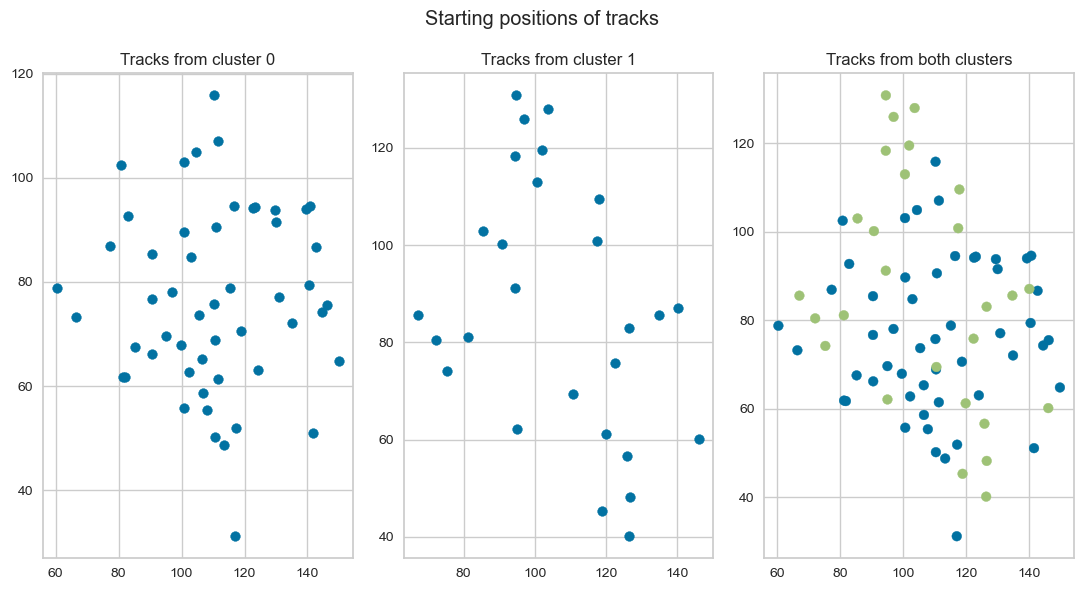

In [77]:
# Ploting points in scatterplot in subplot:
colors = {'0': '#0171A1', '1': '#9EC276'}
fig = plt.figure(figsize = (11,6))
fig.suptitle("Starting positions of tracks")
ax = plt.subplot(131)
ax.set_title("Tracks from cluster 0")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
                data = df_with_start_points_cluster_0)

ax = plt.subplot(132)
ax.set_title("Tracks from cluster 1")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
                data = df_with_start_points_cluster_1)

ax = plt.subplot(133)
ax.set_title("Tracks from both clusters")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
           data = df_start_points_both_clusters,
           c=df_start_points_both_clusters['CLUST_LABEL'].astype(str).map(colors))

fig.tight_layout()
plt.savefig("tracks_startins_positions_2_clusters.jpeg")
plt.show()

### Performing testing within 4 choosen clusters

### Spliting data across 4 clusters

In [78]:
# getting the list of pandas indexes to get track_id
# we can use cast0 and cast1 variables:
indexes_list_clust_0_h = list(cust0_hierarchy.index.values)
indexes_list_clust_1_h= list(cust1_hierarchy.index.values)
indexes_list_clust_2_h= list(cust2_hierarchy.index.values)
indexes_list_clust_3_h= list(cust3_hierarchy.index.values)

tracks_from_cluster_0_h = list()
tracks_from_cluster_1_h = list()
tracks_from_cluster_2_h = list()
tracks_from_cluster_3_h = list()

# prepering list of tracks_IDs from only tracks df for every by
# indexes we know from prior analysis:
def get_list_of_tracks_IDs(indexes_from_cluster, index_list_out, df_with_tracks_IDs):
    for obj in indexes_from_cluster:
        index_list_out.append(df_with_tracks_IDs[obj])

In [79]:
# performing for all clusters:
get_list_of_tracks_IDs(indexes_list_clust_0_h, tracks_from_cluster_0_h,
                                               tracks_IDs)
get_list_of_tracks_IDs(indexes_list_clust_1_h, tracks_from_cluster_1_h,
                                               tracks_IDs)
get_list_of_tracks_IDs(indexes_list_clust_2_h, tracks_from_cluster_2_h,
                                               tracks_IDs)
get_list_of_tracks_IDs(indexes_list_clust_3_h, tracks_from_cluster_3_h,
                                               tracks_IDs)

In [80]:
# Preparing data for plot and pearsonr test, making frames containg
# only observations from certain cluster:
df_tracks_clust_0_h = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_0_h)]
df_tracks_clust_1_h = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_1_h)]
df_tracks_clust_2_h = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_2_h)]
df_tracks_clust_3_h = sorted_tracks_df[sorted_tracks_df['TRACK_ID'].astype(str).isin(tracks_from_cluster_3_h)]

### Performing Pearson corelation test to check linearity of the tracks vectors between 4 selcted clusters from hierarchical clustering:

In [81]:
# Performing the Pearson correlation on tracks from cluster0 to check 
# if the tracks movement are linear

# making list of list to store x_positions and y_postions of movement
# for each track separately
df_track_positions_clust_0_h = df_tracks_clust_0_h[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()
df_track_positions_clust_1_h= df_tracks_clust_1_h[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()
df_track_positions_clust_2_h= df_tracks_clust_2_h[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()
df_track_positions_clust_3_h= df_tracks_clust_3_h[['TRACK_ID',
                                                'POSITION_X',
                                                'POSITION_Y']].copy()

# Gruping tracks positions for each cluster:
group_clust_0_h = df_track_positions_clust_0_h.apply(tuple,1).tolist()
group_clust_1_h = df_track_positions_clust_1_h.apply(tuple,1).tolist()
group_clust_2_h = df_track_positions_clust_2_h.apply(tuple,1).tolist()
group_clust_3_h = df_track_positions_clust_3_h.apply(tuple,1).tolist()

In [82]:
# Its obligatory to precreate df to store pearson values
df_pearsonr_out_clust_0_h= pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])
df_pearsonr_out_clust_1_h= pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])
df_pearsonr_out_clust_2_h= pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])
df_pearsonr_out_clust_3_h= pd.DataFrame(columns = ['TRACK_ID',
                                                  'PEARSON_COEF',
                                                  'P_VALUE',
                                                  'PATH_LINEARITY'])

get_tracks_pearson_coef_from_records(group_clust_0_h,
                                  tracks_from_cluster_0_h,
                                  df_pearsonr_out_clust_0_h)
get_tracks_pearson_coef_from_records(group_clust_1_h,
                                     tracks_from_cluster_1_h,
                                    df_pearsonr_out_clust_1_h)
get_tracks_pearson_coef_from_records(group_clust_2_h,
                                     tracks_from_cluster_2_h,
                                    df_pearsonr_out_clust_2_h)
get_tracks_pearson_coef_from_records(group_clust_3_h,
                                     tracks_from_cluster_3_h,
                                    df_pearsonr_out_clust_3_h)
# Saving data_frames_to file:
df_pearsonr_out_clust_0_h.to_csv('pearosn_out_clust_0_h.csv')
df_pearsonr_out_clust_1_h.to_csv('pearosn_out_clust_1_h.csv')
df_pearsonr_out_clust_2_h.to_csv('pearosn_out_clust_2_h.csv')
df_pearsonr_out_clust_3_h.to_csv('pearosn_out_clust_3_h.csv')

### Performing pairwise.t.test 

In [83]:
# Clearing the data out of observation with p_vlaue greater than 0.05:
df_pearson_clust_0_h_filtered = df_pearsonr_out_clust_0_h.loc[df_pearsonr_out_clust_0_h['P_VALUE'] < 0.05]
df_pearson_clust_1_h_filtered = df_pearsonr_out_clust_1_h.loc[df_pearsonr_out_clust_1_h['P_VALUE'] < 0.05]
df_pearson_clust_2_h_filtered = df_pearsonr_out_clust_2_h.loc[df_pearsonr_out_clust_2_h['P_VALUE'] < 0.05]
df_pearson_clust_3_h_filtered = df_pearsonr_out_clust_3_h.loc[df_pearsonr_out_clust_3_h['P_VALUE'] < 0.05]

In [84]:
# Concatenating data to singular dataframe
df_pearson_clust_0_h_filtered.insert(4, 'CLUST_LABEL', 0)
df_pearson_clust_1_h_filtered.insert(4, 'CLUST_LABEL', 1)
df_pearson_clust_2_h_filtered.insert(4, 'CLUST_LABEL', 2)
df_pearson_clust_3_h_filtered.insert(4, 'CLUST_LABEL', 3)

# Merging the data frame into one:
frames_h_pearson = [df_pearson_clust_0_h_filtered,
                   df_pearson_clust_1_h_filtered,
                   df_pearson_clust_2_h_filtered,
                   df_pearson_clust_3_h_filtered]
df_four_cluster_pearson = pd.concat(frames_h_pearson, copy=True)

In [85]:
df_four_cluster_pearson.head()

TRACK_ID  PEARSON_COEF       P_VALUE                PATH_LINEARITY  \
10       10     -0.291933  2.866926e-05         Negligible corelation   
27       27     -0.279746  4.616389e-04         Negligible corelation   
29       29     -0.701384  1.367970e-21      High positive non-linear   
57       57     -0.637914  6.110839e-12  Moderate positive non-linear   
66       66      0.531656  6.180152e-14      Moderate positive linear   

    CLUST_LABEL  
10            0  
27            0  
29            0  
57            0  
66            0

In [86]:
# performing pairwise ttest from pingouin library
import pingouin as pg
'''
https://pingouin-stats.org/generated/pingouin.pairwise_ttests.html
'''
pg.pairwise_tests(dv='PEARSON_COEF', between='CLUST_LABEL', data=df_four_cluster_pearson)

Contrast  A  B  Paired  Parametric         T        dof alternative  \
0  CLUST_LABEL  0  1   False        True -0.465551  35.995965   two-sided   
1  CLUST_LABEL  0  2   False        True -1.186967  31.596398   two-sided   
2  CLUST_LABEL  0  3   False        True -2.630207  26.863816   two-sided   
3  CLUST_LABEL  1  2   False        True -0.707072  33.486484   two-sided   
4  CLUST_LABEL  1  3   False        True -2.135088  28.532751   two-sided   
5  CLUST_LABEL  2  3   False        True -1.444335  26.263186   two-sided   

      p-unc   BF10    hedges  
0  0.644342  0.344 -0.147303  
1  0.244088  0.565 -0.397992  
2  0.013951   4.05 -0.923551  
3  0.484413  0.393 -0.229099  
4  0.041473  1.815 -0.717598  
5  0.160470  0.758 -0.521472

### Extracting the start position to check if this positions inside 4 clusters differ

In [87]:
# Extracting starting point from tracks in one cluster:
df_with_start_points_cluster_0_h = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_0_h)]
df_with_start_points_cluster_1_h = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_1_h)]
df_with_start_points_cluster_2_h = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_2_h)]
df_with_start_points_cluster_3_h = df_with_start_points[df_with_start_points['TRACK_ID'].astype(str).isin(tracks_from_cluster_3_h)]

# Adding the labels to the dataframes: 
df_with_start_points_cluster_0_h.insert(8, 'CLUST_LABEL', 0)
df_with_start_points_cluster_1_h.insert(8, 'CLUST_LABEL', 1)
df_with_start_points_cluster_2_h.insert(8, 'CLUST_LABEL', 2)
df_with_start_points_cluster_3_h.insert(8, 'CLUST_LABEL', 3)

# Merging the data frame into one:
frames_h = [df_with_start_points_cluster_0_h, df_with_start_points_cluster_1_h,
           df_with_start_points_cluster_2_h, df_with_start_points_cluster_3_h]
df_start_points_four_clusters = pd.concat(frames_h, copy=True)
#df_start_points_four_clusters.to_csv('df_start_points_four_clust.csv')

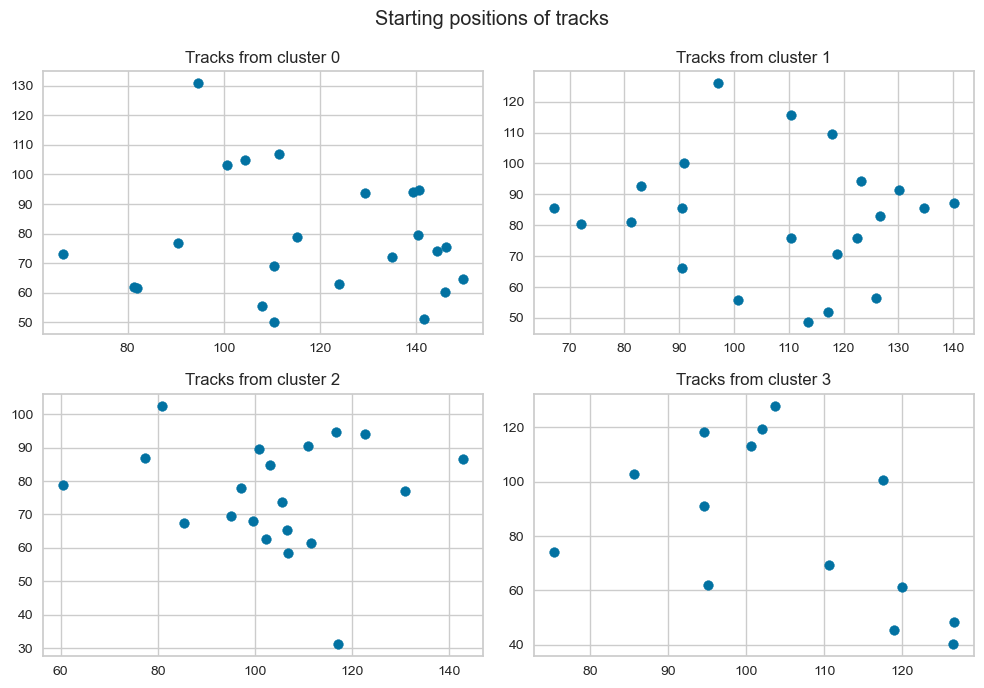

In [88]:
# Ploting points in scatterplot in subplot:
fig = plt.figure(figsize = (10,7))
fig.suptitle("Starting positions of tracks")
ax = plt.subplot(221)
ax.set_title("Tracks from cluster 0")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
                data = df_with_start_points_cluster_0_h)

ax = plt.subplot(222)
ax.set_title("Tracks from cluster 1")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
                data = df_with_start_points_cluster_1_h)

ax = plt.subplot(223)
ax.set_title("Tracks from cluster 2")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
           data = df_with_start_points_cluster_2_h)

ax = plt.subplot(224)
ax.set_title("Tracks from cluster 3")
ax.scatter(x = 'POSITION_X', y='POSITION_Y',
           data = df_with_start_points_cluster_3_h)

fig.tight_layout()
plt.savefig("tracks_starting_positions_4_clusters.jpeg")
plt.show()

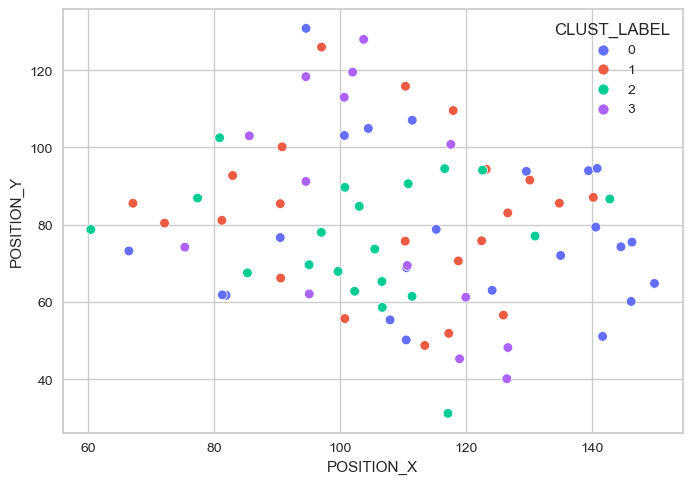

In [89]:
# Plotting all clusters
colors_dict = {0: '#636EFA', 1: '#EE5B43', 2: '#00CC96', 3: '#AB63FA'}
sns.scatterplot(x = 'POSITION_X', y = 'POSITION_Y',data = df_start_points_four_clusters, hue = 'CLUST_LABEL', palette = colors_dict)
plt.savefig("tracks_starting_positions_compare.jpeg")

### Conducting a normality test to prepare data for ANOVA

In [90]:
# The data to be checked will describe the paths and their characteristics 
# in order to identify which of the characteristics has the most information
# and can be used to distinguish the groups

# so for this prepartion we will only need the splited data frames with 
# tracks IDs and they features
df_w_hierarchy_labels_scaled.head()

# Gouping data by the label:

hierarchy_grouped_by_label = df_w_hierarchy_labels_scaled.groupby('Label')

# Checking if the dataframe is grouped as we want:
counts = hierarchy_grouped_by_label.size()

print(counts)

Label
0    23
1    22
2    20
3    14
dtype: int64


In [91]:
# Spliting grouped into different dataframes:
clust_0_h = hierarchy_grouped_by_label.get_group(0)
clust_1_h = hierarchy_grouped_by_label.get_group(1)
clust_2_h = hierarchy_grouped_by_label.get_group(2)
clust_3_h = hierarchy_grouped_by_label.get_group(3)

clust_0_h.head()

TRACK_MIN_SPEED  TRACK_MEDIAN_SPEED  TRACK_STD_SPEED  \
2          0.199467            2.330220         2.093290   
4          1.119190           -0.378039        -0.803749   
7          2.132421            0.809038        -0.010226   
9          1.582322           -0.203032         0.909896   
25         3.674775            1.248020         0.825358   

    TOTAL_DISTANCE_TRAVELED  CONFINEMENT_RATIO  MEAN_STRAIGHT_LINE_SPEED  \
2                 -1.099937          -0.479028                  0.431688   
4                 -0.445610          -1.225252                 -1.319907   
7                 -0.471219          -0.998906                 -0.846143   
9                 -0.801675          -0.174293                 -0.010777   
25                -1.028728          -1.125152                 -0.847337   

    LINEARITY_OF_FORWARD_PROGRESSION  MEAN_DIRECTIONAL_CHANGE_RATE  Label  
2                          -0.479028                     -0.292291      0  
4                          -1.225252                      0.309965      0  
7                          -0.998906                      0.999655      0  
9                          -0.174293                      0.778433      0  
25                         -1.125152                      0.349088      0

In [92]:
from scipy.stats import shapiro
from scipy.stats import fligner
from scipy.stats import f_oneway
from scipy.stats import kruskal
import scikit_posthocs as sp

# Checking the normality of data within groups, 
# and all the features within groups:
feature_list = ["TRACK_MIN_SPEED","TRACK_MEDIAN_SPEED","TRACK_STD_SPEED",
                "TOTAL_DISTANCE_TRAVELED", "CONFINEMENT_RATIO", 
                "MEAN_STRAIGHT_LINE_SPEED", "LINEARITY_OF_FORWARD_PROGRESSION", 
                "MEAN_DIRECTIONAL_CHANGE_RATE"]
groups = [clust_0_h, clust_1_h, clust_2_h, clust_3_h]


def check_all_normality_of_group(group_to_check, list_of_features):
    for feature in list_of_features:
        stat, p = shapiro(group_to_check[feature])
        print(f"{feature}: {p}  | {'Not-Normal' if p < 0.05 else 'Normal'}")
    
    print("\n")
 

def check_equality_of_variance(groups, feature_list):  
    alpha = 0.05

    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            for feature in feature_list:
                w, p_val = fligner(groups[i][feature], groups[j][feature])
                if p_val < alpha:
                    print(f"The variances in group {i} and group {j}: ")
                    print(f"for feature {feature} are not equal (p = {p_val}) \n")
                else:
                    print(f"The variances in group {i} and group {j}: ")
                    print(f"for feature {feature} are equal (p = {p_val}) \n")
  

def perform_ANOVA(group0, group1, group2, group3, feature_list):
    for feature in feature_list:
        f_val, p_val = f_oneway(group0[feature], group1[feature], group2[feature], group3[feature])
        if p_val < alpha:
            print(f"Feature {feature} has significant difference among groups (p = {p_val})\n")
        else:
            print(f"Feature {feature} does not have significant difference among groups (p = {p_val})\n")
            
            
def perform_Kruskal(group0, group1, group2, group3, feature_list):
    dict_p = {}
    for feature in feature_list:
        statistics, p_val = kruskal(group0[feature], group1[feature], group2[feature], group3[feature])
        dict_p[feature] = p_val
        if p_val < alpha:
            print(f"Feature {feature} has significant difference among groups (p = {p_val})\n")
        else:
            print(f"Feature {feature} does not have significant difference among groups (p = {p_val})\n")
    return dict_p
        


In [93]:
# Checking the function:
print("Clust_0")
check_all_normality_of_group(clust_0_h, feature_list)
print("Clust_1")
check_all_normality_of_group(clust_1_h, feature_list)
print("Clust_2")
check_all_normality_of_group(clust_2_h, feature_list)
print("Clust_3")
check_all_normality_of_group(clust_3_h, feature_list)
print("Perforimng the variance equality test (Fligner test): ")
check_equality_of_variance(groups, feature_list)

Clust_0
TRACK_MIN_SPEED: 0.5084385871887207  | Normal
TRACK_MEDIAN_SPEED: 0.2304680049419403  | Normal
TRACK_STD_SPEED: 0.9245135188102722  | Normal
TOTAL_DISTANCE_TRAVELED: 0.12023353576660156  | Normal
CONFINEMENT_RATIO: 0.12562604248523712  | Normal
MEAN_STRAIGHT_LINE_SPEED: 0.0013909271219745278  | Not-Normal
LINEARITY_OF_FORWARD_PROGRESSION: 0.12562604248523712  | Normal
MEAN_DIRECTIONAL_CHANGE_RATE: 0.8121321201324463  | Normal


Clust_1
TRACK_MIN_SPEED: 0.025114988908171654  | Not-Normal
TRACK_MEDIAN_SPEED: 0.9138146638870239  | Normal
TRACK_STD_SPEED: 0.28988686203956604  | Normal
TOTAL_DISTANCE_TRAVELED: 0.012644884176552296  | Not-Normal
CONFINEMENT_RATIO: 0.20470499992370605  | Normal
MEAN_STRAIGHT_LINE_SPEED: 0.27920520305633545  | Normal
LINEARITY_OF_FORWARD_PROGRESSION: 0.20470499992370605  | Normal
MEAN_DIRECTIONAL_CHANGE_RATE: 0.4405980706214905  | Normal


Clust_2
TRACK_MIN_SPEED: 0.24730557203292847  | Normal
TRACK_MEDIAN_SPEED: 0.5307154059410095  | Normal
TRACK_STD_

In [94]:
perform_ANOVA(clust_0_h, clust_1_h, clust_2_h, clust_3_h, feature_list)

Feature TRACK_MIN_SPEED has significant difference among groups (p = 3.654290735498807e-12)

Feature TRACK_MEDIAN_SPEED has significant difference among groups (p = 8.377755710116182e-11)

Feature TRACK_STD_SPEED has significant difference among groups (p = 1.7720971767833826e-10)

Feature TOTAL_DISTANCE_TRAVELED has significant difference among groups (p = 5.264692999981408e-07)

Feature CONFINEMENT_RATIO has significant difference among groups (p = 1.3107975556782692e-21)

Feature MEAN_STRAIGHT_LINE_SPEED has significant difference among groups (p = 6.62517861070921e-10)

Feature LINEARITY_OF_FORWARD_PROGRESSION has significant difference among groups (p = 1.3107975556782792e-21)

Feature MEAN_DIRECTIONAL_CHANGE_RATE does not have significant difference among groups (p = 0.25337196310211413)



In [95]:
res = perform_Kruskal(clust_0_h, clust_1_h, clust_2_h, clust_3_h, feature_list)
print(res)

Feature TRACK_MIN_SPEED has significant difference among groups (p = 1.643985960228235e-08)

Feature TRACK_MEDIAN_SPEED has significant difference among groups (p = 4.3345605496397994e-08)

Feature TRACK_STD_SPEED has significant difference among groups (p = 8.266085719258175e-08)

Feature TOTAL_DISTANCE_TRAVELED has significant difference among groups (p = 9.829392344403302e-06)

Feature CONFINEMENT_RATIO has significant difference among groups (p = 1.443308058133487e-11)

Feature MEAN_STRAIGHT_LINE_SPEED has significant difference among groups (p = 5.66762422468812e-09)

Feature LINEARITY_OF_FORWARD_PROGRESSION has significant difference among groups (p = 1.443308058133487e-11)

Feature MEAN_DIRECTIONAL_CHANGE_RATE does not have significant difference among groups (p = 0.15368963123032792)

{'TRACK_MIN_SPEED': 1.643985960228235e-08, 'TRACK_MEDIAN_SPEED': 4.3345605496397994e-08, 'TRACK_STD_SPEED': 8.266085719258175e-08, 'TOTAL_DISTANCE_TRAVELED': 9.829392344403302e-06, 'CONFINEMENT_RA

In [96]:
# Performing posthoc Dunn test:

# combining data from 4 df into single array:
clust_data = pd.concat([clust_0_h, clust_1_h, clust_2_h, clust_3_h], ignore_index=True)

# creating group labels:
clust_data['cluster'] = clust_data['Label'].map({0: 'cluster0', 1: 'cluster1', 2: 'cluster2', 3: 'cluster3'})

def perform_posthoc_dunn(merged_data, feature_list):
    dict_p = {}
    for feature in feature_list:
        posthoc_results = sp.posthoc_dunn(merged_data, val_col=feature, group_col='cluster')
        dict_p[feature] = posthoc_results
        print(f"DIfferences in groups according to {feature}: ")
        print(f"{posthoc_results} \n")
        
    return dict_p

In [97]:
print("The p-value matrix shows the p-values for all possible pairwise comparisons, where a p-value of less than 0.05 is considered to be statistically significant and indicates that there are differences between the groups. \n")
res_dunn = perform_posthoc_dunn(clust_data, feature_list)
res_dunn

The p-value matrix shows the p-values for all possible pairwise comparisons, where a p-value of less than 0.05 is considered to be statistically significant and indicates that there are differences between the groups. 

DIfferences in groups according to TRACK_MIN_SPEED: 
              cluster0      cluster1  cluster2      cluster3
cluster0  1.000000e+00  1.278693e-07  0.000015  3.945145e-07
cluster1  1.278693e-07  1.000000e+00  0.412616  6.735631e-01
cluster2  1.532653e-05  4.126164e-01  1.000000  2.544072e-01
cluster3  3.945145e-07  6.735631e-01  0.254407  1.000000e+00 

DIfferences in groups according to TRACK_MEDIAN_SPEED: 
              cluster0      cluster1  cluster2  cluster3
cluster0  1.000000e+00  1.337207e-08  0.001405  0.000009
cluster1  1.337207e-08  1.000000e+00  0.020165  0.573580
cluster2  1.404648e-03  2.016477e-02  1.000000  0.131630
cluster3  9.403591e-06  5.735796e-01  0.131630  1.000000 

DIfferences in groups according to TRACK_STD_SPEED: 
              cluster0  

{'TRACK_MIN_SPEED':               cluster0      cluster1  cluster2      cluster3
 cluster0  1.000000e+00  1.278693e-07  0.000015  3.945145e-07
 cluster1  1.278693e-07  1.000000e+00  0.412616  6.735631e-01
 cluster2  1.532653e-05  4.126164e-01  1.000000  2.544072e-01
 cluster3  3.945145e-07  6.735631e-01  0.254407  1.000000e+00,
 'TRACK_MEDIAN_SPEED':               cluster0      cluster1  cluster2  cluster3
 cluster0  1.000000e+00  1.337207e-08  0.001405  0.000009
 cluster1  1.337207e-08  1.000000e+00  0.020165  0.573580
 cluster2  1.404648e-03  2.016477e-02  1.000000  0.131630
 cluster3  9.403591e-06  5.735796e-01  0.131630  1.000000,
 'TRACK_STD_SPEED':               cluster0      cluster1  cluster2  cluster3
 cluster0  1.000000e+00  2.072083e-08  0.002568  0.000018
 cluster1  2.072083e-08  1.000000e+00  0.015219  0.525565
 cluster2  2.567810e-03  1.521911e-02  1.000000  0.126230
 cluster3  1.774494e-05  5.255647e-01  0.126230  1.000000,
 'TOTAL_DISTANCE_TRAVELED':               clust

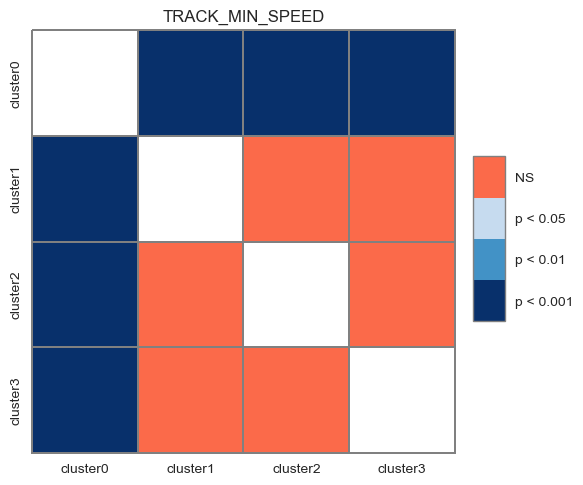

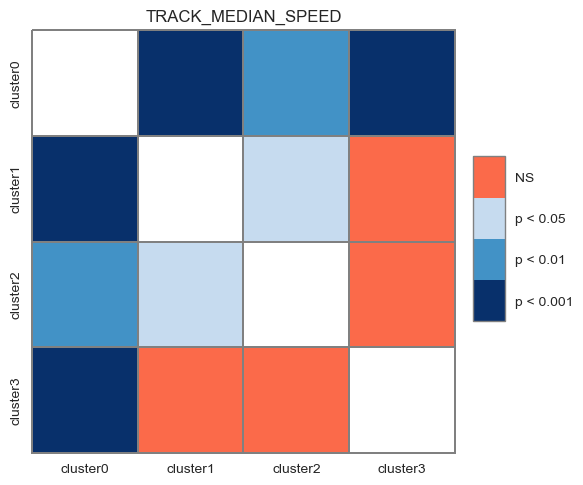

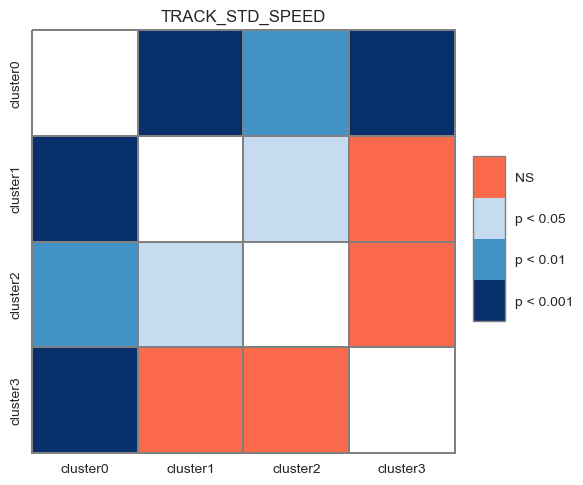

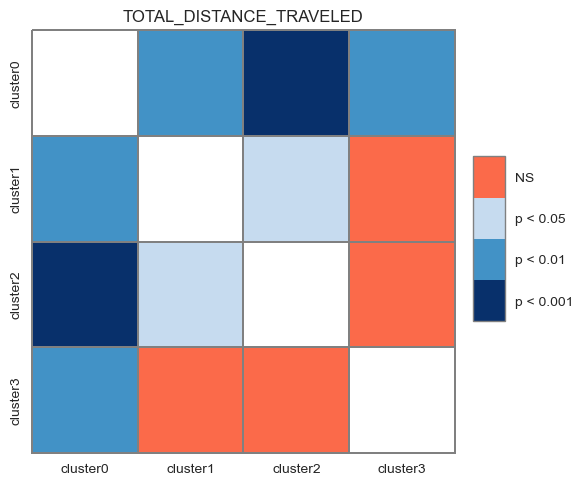

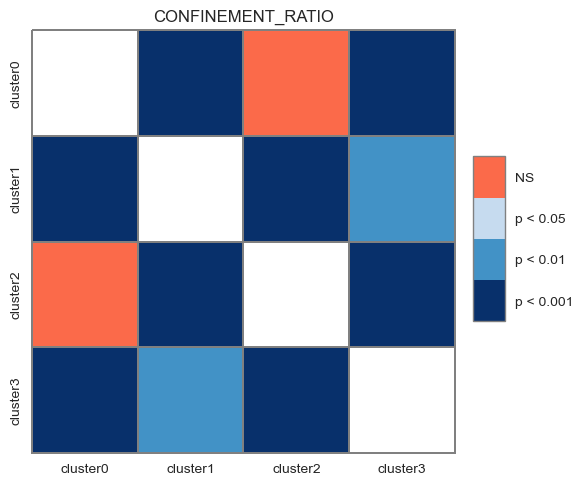

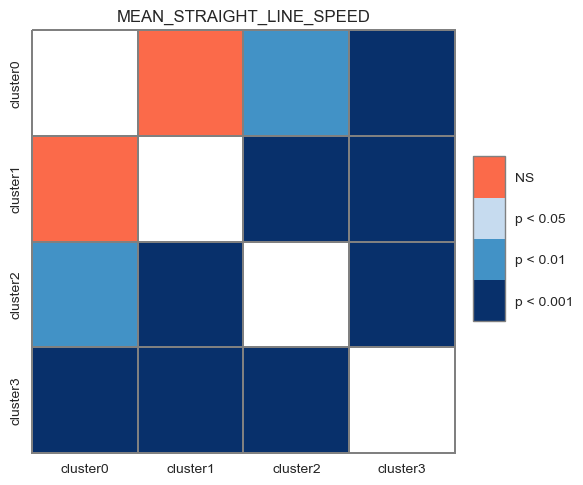

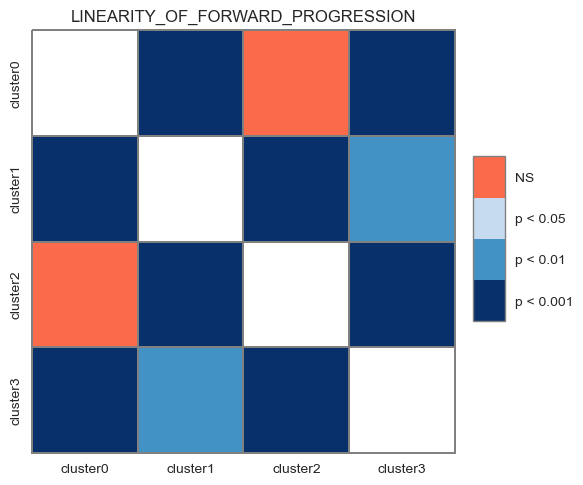

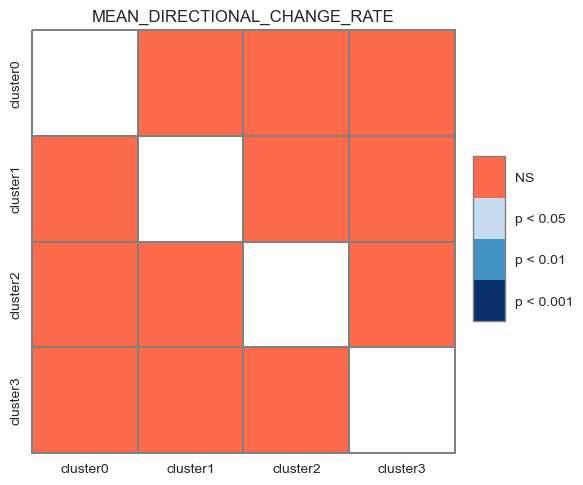

<Figure size 800x550 with 0 Axes>

In [98]:
# Perforimng the heatmap for dune results:
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False,
                'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

for feature, matrix in res_dunn.items():
    px, cbar= sp.sign_plot(matrix, **heatmap_args)
    px.set_title(feature)
    plt.figure()
    px.figure.savefig(f"{feature}_dunn_heatmap.png")
    
plt.show()
    

In [99]:
clust_data.head()
clust_data
clust_data.to_csv("clust_merged.csv")

### To do:
1. perforimng hypothesis testing to look if the groups differ from each other. 